# Uppgift 3 - Bildklassificering 

I denna uppgiften ska ni testa på att klassificera bilder mha 2 (3) olika tekniker:
* SVM - Support vector machines
* Fully-connected Neural Network (FC)
* Convolutional Neural Network (CNN)

Ni ska jämföra resultaten på test-setet utifrån bl.a. hur mycket data som användes för att träna de olika modellerna. Ni ska **kommentera koden** som ni skriver med korta förklaringar på vad koden gör.

Datasetet som ni kommer använda er av är ett subset av data från MNIST och innehåller handskrivna siffror från 0-9 i gråskala [0-255]. Datan är uppdelad i två filer, **train.csv** och **test.csv**, som finns tillsammans med uppgiften på Canvas.

Till er hjälp så är det meningen att ni ska använda er av följande paket:
* torch --- Huvudpaketet för ''pytorch'', används för att implementera och träna neurala nät.
* torchvision --- Stödpaket för ''pytorch'', används för att hantera data.
* sklearn --- Huvudpaketet för ''scikit-learn'', används för att implementera SVM:s.
* matplotlib --- Verktyg för att plotta grafer/bilder.
* pandas --- Verktyg för datahantering
* numpy --- Verktyg för datahantering/matris-manipulering

Paketen kan installeras på olika sätt, exempelvis genom Python-verktyget pip, och det kan då se ut såhär:

<pre><code> pip install torch </pre></code>

eller

<pre><code> pip3 install scikit-learn </pre></code>

Vi rekommenderar att ni gör detta i en virtuell Python-miljö via exempelvis Anaconda och med Python-version 3.8.*.

Paketen och klasserna som ska importeras är fördefinierade här under.

In [1]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.svm import SVC

### Uppgift 1 -  Ladda data

1. Ladda in datan från de två filerna med hjälp av **pandas** och spara i varsin DataFrame, train_df & test_df.
2. Dela upp träningsdatan i två delar, en för träning och en för validering, genom att specificera storleken på träningsdatan n_training_large. Skapa även en kopia av träningsdatan där endast de första 1000 datapunkterna ingår. Använd samma valideringsdata för alla modeller.
3. Ge en kort motivering till varför ni valt just detta värdet på **n_training_large**. 
4. Ta reda på vilken column i datan som innehåller svaret på vilken klass en bild tillhör och printa det.

In [2]:
# Uppgift 1.1

# Load the two files into dataframes using pandas and store 
train_df = pd.read_csv("train.csv") # CODE HERE
test_df = pd.read_csv("test.csv")  # CODE HERE

In [3]:
# Uppgift 1.2

# Separate the data into a suitable split between training and validation
# by specifing the number of samples in the training set, n_training_data.
n_training_small = 1000
n_training_large = len(train_df) * 3//4


print('Training data - small: {}'.format(n_training_small))
print('Training data - large: {}'.format(n_training_large))
print('Validation data: {}'.format(len(train_df) - n_training_large))
print('Test data: {}'.format(len(test_df)))

Training data - small: 1000
Training data - large: 23998
Validation data: 8000
Test data: 10002


Ge en kort motivering till valet av storleken på **n_training_large**

In [4]:
# Uppgift 1.3
# ANSWER HERE

In [5]:
# This code separates the data into two parts according to the size of the training data, n_training_large & n_training_small,
# specified above.
val_df = train_df.iloc[n_training_large:, :].copy()
train_df_small = train_df.iloc[0:n_training_small, :].copy()
train_df = train_df.iloc[0:n_training_large, :].copy()

In [6]:
# Printing the shape of the data
print(train_df.shape)
print(train_df_small.shape)
print(val_df.shape)
print(test_df.shape)

(23998, 785)
(1000, 785)
(8000, 785)
(10002, 785)


In [7]:
# Uppgift 1.4

# Figure out which column that contains the labels (classes) and print it he
train_df["label"]

0        1
1        0
2        1
3        4
4        0
        ..
23993    9
23994    6
23995    7
23996    3
23997    9
Name: label, Length: 23998, dtype: int64

### Uppgift 2 - Formatera data

Kod för att bearbeta data kan snabbt bli rörig och svår att underhålla och bör därför inte hänga ihop med koden som tränar nätverken. Detta ger också bättre läsbarhet och ökad modularitet. PyTorch tillhandahåller två hjälp-klasser: **torch.utils.data.DataLoader** och **torch.utils.data.Dataset** som låter dig ladda in färdiga dataset samt skapa egna. Klassen **Dataset** lagrar datapunkterna och deras motsvarande labels och **DataLoader** gör om datasetet till en *iterable* för att göra det enkelt att använda datapunkterna. I koden i blocket nedan så ser ni skelettet till ett egenskapat dataset, **MNISTDataset**, som ärver klassen **Dataset**. 


1. Gör klart implementationen av Dataset-klassen **MNISTDataset** genom att skriva kod som separerar datan i labels och features samt normaliserar datan och gör om den till matriser som motsvarar bilder av storleken 28x28 pixlar.
2. Skapa 4 dataset utifrån train_df, train_df_small, val_df och test_df.
3. Bestäm storlekarna på batcherna som ska användas vid träning respektive testning och skapa 4 DataLoaders för de fyra dataseten ovan. Träningsdatan ska slumpas men inte validering och test.
4. Plotta ett par exempelbilder och deras labels mha **matplotlib** och DataLoadern för träningssetet.

In [8]:
# Uppgift 2.1

class MNISTDataset(Dataset): 
  def __init__(self, df):
    # Separate the labels and the pixel values into the arrays y and x, respectively.
    # CODE HERE
    y = []
    x = []
    
    for index,row in df.iterrows():
        y.append(row["label"])
        pixels=row.loc[df.columns != "label"]
        x.append(pixels.values.reshape((28,28)) / 255) 
        
    
    
    # Normalize the x-values and transform the data into images of size (color channels, width, height), i.e. w(1, 28, 28).
    # CODE HERE
    
    


    # the numpy arrays are converted into tensors that will be used in the training and testing of the network
    self.x=torch.tensor(x,dtype=torch.float32)
    self.y=torch.tensor(y)
 
  def __len__(self):
    # returns the number of samples in the dataset
    return len(self.y)
   
  def __getitem__(self, idx):
    # returns a sample from the dataset at the given index idx
    return self.x[idx], self.y[idx]

In [9]:
# Uppgift 2.2

# Create four datasets, from the dataframes defined earlier, using the MNISTDataset class
train_dataset = MNISTDataset(train_df)
train_dataset_small = MNISTDataset(train_df_small)
val_dataset = MNISTDataset(val_df)
test_dataset = MNISTDataset(test_df)



<ipython-input-8-ae865c1544f5>:24: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:233.)
  self.x=torch.tensor(x,dtype=torch.float32)


In [10]:
# Uppgift 2.3

# Specify the batch_sizes to use for training and testing
batch_size_train = 10
batch_size_test = 10

# Create four DataLoaders from the four datasets above. Shuffle the training data but not the others.
train_dload = DataLoader(train_dataset, batch_size=batch_size_train)
train_dload_small = DataLoader(train_dataset_small, batch_size=batch_size_train)
val_dload = DataLoader(val_dataset, batch_size=batch_size_train) 
#test_dload = 

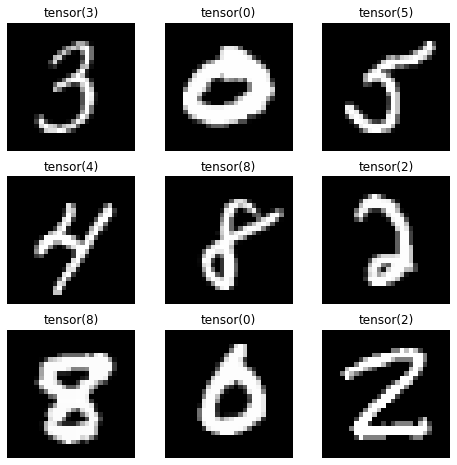

In [11]:
# Uppgift 2.4

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# Plot images and labels for a few examples using the DataLoader for the training set.
# CODE HERE

### Uppgift 3 - Bygga dense-nätverk

Det första neurala nätverket vi ska skapa är ett så kallat Fully-connected/Dense Neural Network och består därför endast av lager där alla neuroner i ett lager är sammankopplade med alla neuroner från lagret innan. I **pytorch** så kan man skapa sin egen klass för ett nätverk genom att ärva *nn.Module* och implementera en *__ init__()* samt en *forward()* metod.

Ett lager av typen FC skapas i **pytorch** med hjälp av *nn.Linear* enligt exemplet nedan. 
<pre><code> nn.Linear(nr_of_input_neurons, nr_of_output_neurons) </pre></code>
De viktigaste input-parametrarna är antalet neuroner i lagret innan, **nr_of_input_neurons**, samt hur många neuroner detta lagret ska ha, **nr_of_output_neurons**. Mer information hittar ni i dokumentationen: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear

I dokumentationen hittar ni också information om olika aktiveringsfunktioner: https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity

När nätverket är färdigt så är nästa steg att bestämma sin loss-funktion samt learning rate och optimerare.

1. Gör klart nätverket.
2. Välj loss-funktion, learning rate och optimizers.

In [12]:
# Uppgift 3.1

class DenseNet(nn.Module):
    def __init__(self, input_size=784, num_classes=10):
        super().__init__()

        # Add more Linear (FC/Dense) layers here and experiment with different number of neurons.
        self.fc_in = nn.Linear(input_size, 500)
        self.fc_middle = nn.Linear(500, 100)
        self.fc_middle2 = nn.Linear(100, 8)
        self.fc_out = nn.Linear(self.fc_middle2.out_features, num_classes)

        self.activation = nn.ReLU()

    def forward(self, x):
        # Reshapes the input of size (batch x 1x28x28) into a vector (batch x784)
        x = x.view(x.shape[0], -1)

        x = self.fc_in(x)
        
        x = self.activation(x)
        
        x = self.fc_middle(x)
        x = self.activation(x)
        
        x = self.fc_middle2(x)
        x = self.activation(x)

        x = self.fc_out(x)

        return x

In [13]:
# Create the network
dense_net = DenseNet()

# Printing the network gives an overview of the network structure
print(dense_net)
# and calculating the nuber of parameters gives the size of the network
print('Number of parameters: {}'.format(sum([param.nelement() for param in dense_net.parameters()])))


DenseNet(
  (fc_in): Linear(in_features=784, out_features=500, bias=True)
  (fc_middle): Linear(in_features=500, out_features=100, bias=True)
  (fc_middle2): Linear(in_features=100, out_features=8, bias=True)
  (fc_out): Linear(in_features=8, out_features=10, bias=True)
  (activation): ReLU()
)
Number of parameters: 443498


Bestäm en learning rate, vilken loss-funktion samt vilken optimerare som ska användas för att lösa uppgiften.

Loss-funktioner hittar man i modulen **nn** på följande sätt: 

<pre><code> nn.NamnetPåLossFunktionen() </pre></code>

där de olika varianterna hittas här https://pytorch.org/docs/stable/nn.html#loss-functions

och optimerare:

<pre><code> optim.NamnetPåOptimeraren() </pre></code>

som hittas här https://pytorch.org/docs/stable/optim.html

In [14]:
# Uppgift 3.2

learning_rate = 0.1

loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(dense_net.parameters(), lr= learning_rate)

### Uppgift 4 - Träna och evaluera dense-nätverk

Träning av nätverket innebär att vi i epoker (upprepade omgångar) låter nätverket gissa klassen på samtliga våra bilder i träningsdatan. Felet och dess gradienterna för samtliga parametrar beräknas mha loss-funktionen och nätverket uppdateras sen utifrån gradienterna av optimeraren.

1. Skriv en funktion *train(network, epoch, dataset)* som tar emot nätverket, numret på en epok samt träningsdata och utför träning av nätverket i batcher tills all data har gåtts igenom en gång. Beräkna gradienterna och uppdatera värdet.
2. Skriv en funktion *test(dataset)* som beräknar average loss och accuracy för nätverket på ett angivet dataset och sedan printar detta. Funktionen ska returnera snitt-felet som ett värde.
3. Experimentera er fram till ett nätverk som presterar bra (>96% accuracy) på det stora träningssetet och jämför sedan resultatet med en kopia av samma nätverk som man tränar om med det lilla datasetet.

Nedan följer en beskrivning i text av vad *train* ska göra:

<pre><code> 
funktion train(network, epoch, dataset)
    Sätt nätverket i träningsläge
    För varje batch i datasetet
        Nollställ optimerarens gradienter    
        Beräkna nätverkets gissningar utifrån batchen med data
        Beräkna felet mha loss-funktionen och true-labels/targets
        Beräkna fel-gradienterna för samtliga parametrar
        Uppdatera nätverket mha optimeraren
        
        För vissa batcher, printa info om hur träningen går, exempelvis batch, loss och procent av epoken som är klar.
</pre></code>

In [15]:
# Uppgift 4.1

def train(network, epoch, dataset):
    network.train()
    for i,(train_features,train_labels) in enumerate(dataset):
        optimizer.zero_grad()
        output = network(train_features)
        loss = loss_function(output, train_labels)
        loss.backward()
        optimizer.step()
        print(f"Batch = {i}, loss = {loss}, epoch = {epoch}")
        
    #raise NotImplementedError('Function not implemented yet.')

Nedan följer en beskrivning i text av vad *test* ska göra:

<pre><code> 
funktion test(network, dataset)
    y_true = []
    y_pred = []
    
    Sätt nätverket i evalueringsläge
    Stäng av användningen av gradienter
        För varje batch i datasetet
            Beräkna nätverkets gissningar utifrån batchen med data
            Beräkna felet mha loss-funktionen och true-labels/targets
            Spara gissningarna i y_pred
            Spara de rätta svaren i y_true
            
    Använd y_pred och y_true för att beräkna accuracy och skapa en confusion matrix
    Printa Avg. loss, accuracy och en confusion matrix
    Returnera Avg. loss
</pre></code>

In [55]:
# Uppgift 4.2

def test(network, dataset):
    y_true = []
    y_pred = []
    losses = []
    network.eval()
    with torch.no_grad():
        for i,(features,labels) in enumerate(dataset):
            output = network(features)
            loss = loss_function(output, labels)
            y_pred.append(output)
            y_true.append(labels)
            losses.append(loss)
    print(f"Batch = {i}, loss = {loss}, epoch = {epoch}")
    avg_loss = np.mean(losses)
    TP = 0
    for i in range(len(y_true)):
        true = y_true[i]
        pred = y_pred[i]
        _, indices = torch.max(pred, 1)
        #print(true, pred)
        match=True
        for j in range(len(true)):
            if true[j]== indices[j]:
                TP+=1
        
    accuracy = TP/(len(y_true)*len(y_true[0]))
    print(f"Avg. Loss = {avg_loss}, Accuracy = {accuracy}")
    
    
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    import itertools as it
    y_true_list=[]
    y_pred_list=[]
    #print(y_pred)
    #print(y_true)
    for yt, yp in zip (y_true, y_pred):
        for j in range(len(yp)):
            y_true_list.append(yt[j].item())
            _,x = torch.max(yp,1)
            y_pred_list.append(x[j].item())
    #print(y_pred_list)
    cm = confusion_matrix(y_true_list, y_pred_list)
    

        
     
    return avg_loss, cm
    #raise NotImplementedError('Function not implemented yet.')

Det som är kvar nu är att träna nätverket i flera omgångar (epoker) och kontinuerligt utvärdera hur träningen går mha valideringsdatan. Varje gång en ny lägsta (bästa) loss uppnås så kan modellen och optimeraren sparas för att användas igen senare.

In [17]:
n_epochs = 10
net_filename = "net.txt"
opti_filename = "opti.txt"
best_loss = 10 ** 4

for epoch in range(1, n_epochs + 1):
    # Perform training once on the entire set of training data
    train(dense_net, epoch, train_dload)  
    
    # Evaluate the net using validation data
    val_loss,_ = test(dense_net, val_dload)
    
    # If the latest training yielded a lower validation loss than ever before, save the model to file such that the best one
    # can always be retrieved afterwards. 
    if val_loss < best_loss:
        print('Saving best model to {}\n'.format('./results/{}.pth'.format(net_filename)))
        
        # Save the network
        torch.save(dense_net.state_dict(), './results/{}.pth'.format(net_filename))
        # Save the optimizer, in case we want to continue training later
        torch.save(optimizer.state_dict(), './results/{}.pth'.format(opti_filename))
        # Update the best loss to the current loss
        best_loss = val_loss

Batch = 0, loss = 2.3808159828186035, epoch = 1
Batch = 1, loss = 2.2719435691833496, epoch = 1
Batch = 2, loss = 2.278254985809326, epoch = 1
Batch = 3, loss = 2.2614994049072266, epoch = 1
Batch = 4, loss = 2.3950648307800293, epoch = 1
Batch = 5, loss = 2.1884262561798096, epoch = 1
Batch = 6, loss = 2.3286943435668945, epoch = 1
Batch = 7, loss = 2.3286068439483643, epoch = 1
Batch = 8, loss = 2.2369983196258545, epoch = 1
Batch = 9, loss = 2.2945330142974854, epoch = 1
Batch = 10, loss = 2.2941031455993652, epoch = 1
Batch = 11, loss = 2.3063197135925293, epoch = 1
Batch = 12, loss = 2.335261821746826, epoch = 1
Batch = 13, loss = 2.3982393741607666, epoch = 1
Batch = 14, loss = 2.410386323928833, epoch = 1
Batch = 15, loss = 2.3125417232513428, epoch = 1
Batch = 16, loss = 2.3325111865997314, epoch = 1
Batch = 17, loss = 2.3760504722595215, epoch = 1
Batch = 18, loss = 2.2647814750671387, epoch = 1
Batch = 19, loss = 2.3194146156311035, epoch = 1
Batch = 20, loss = 2.299909591674

Batch = 169, loss = 0.8077129125595093, epoch = 1
Batch = 170, loss = 0.783510684967041, epoch = 1
Batch = 171, loss = 0.8919695615768433, epoch = 1
Batch = 172, loss = 0.5800708532333374, epoch = 1
Batch = 173, loss = 1.3115522861480713, epoch = 1
Batch = 174, loss = 1.2087877988815308, epoch = 1
Batch = 175, loss = 1.3676105737686157, epoch = 1
Batch = 176, loss = 0.8895271420478821, epoch = 1
Batch = 177, loss = 1.9694074392318726, epoch = 1
Batch = 178, loss = 1.1959524154663086, epoch = 1
Batch = 179, loss = 1.2819713354110718, epoch = 1
Batch = 180, loss = 1.0450034141540527, epoch = 1
Batch = 181, loss = 1.9149417877197266, epoch = 1
Batch = 182, loss = 1.822265386581421, epoch = 1
Batch = 183, loss = 1.5822217464447021, epoch = 1
Batch = 184, loss = 1.7413883209228516, epoch = 1
Batch = 185, loss = 0.9247754812240601, epoch = 1
Batch = 186, loss = 1.0266481637954712, epoch = 1
Batch = 187, loss = 1.241363525390625, epoch = 1
Batch = 188, loss = 1.467502474784851, epoch = 1
Batc

Batch = 340, loss = 0.2291174829006195, epoch = 1
Batch = 341, loss = 1.0590856075286865, epoch = 1
Batch = 342, loss = 1.160789132118225, epoch = 1
Batch = 343, loss = 0.6791857481002808, epoch = 1
Batch = 344, loss = 0.8940263986587524, epoch = 1
Batch = 345, loss = 0.44840747117996216, epoch = 1
Batch = 346, loss = 0.16283300518989563, epoch = 1
Batch = 347, loss = 0.22974319756031036, epoch = 1
Batch = 348, loss = 0.2864534258842468, epoch = 1
Batch = 349, loss = 0.3177683651447296, epoch = 1
Batch = 350, loss = 0.8580834269523621, epoch = 1
Batch = 351, loss = 0.24311420321464539, epoch = 1
Batch = 352, loss = 1.4856538772583008, epoch = 1
Batch = 353, loss = 0.42949753999710083, epoch = 1
Batch = 354, loss = 0.5988985896110535, epoch = 1
Batch = 355, loss = 1.1576602458953857, epoch = 1
Batch = 356, loss = 0.8411587476730347, epoch = 1
Batch = 357, loss = 0.5601271390914917, epoch = 1
Batch = 358, loss = 0.7084811925888062, epoch = 1
Batch = 359, loss = 0.23957562446594238, epoch

Batch = 517, loss = 0.2726726233959198, epoch = 1
Batch = 518, loss = 0.28931164741516113, epoch = 1
Batch = 519, loss = 0.20083419978618622, epoch = 1
Batch = 520, loss = 0.045635439455509186, epoch = 1
Batch = 521, loss = 0.5019994974136353, epoch = 1
Batch = 522, loss = 0.7025631666183472, epoch = 1
Batch = 523, loss = 0.4611133635044098, epoch = 1
Batch = 524, loss = 0.9437891244888306, epoch = 1
Batch = 525, loss = 0.5614231824874878, epoch = 1
Batch = 526, loss = 0.17482666671276093, epoch = 1
Batch = 527, loss = 0.4668906629085541, epoch = 1
Batch = 528, loss = 0.3219071924686432, epoch = 1
Batch = 529, loss = 1.1268703937530518, epoch = 1
Batch = 530, loss = 0.46508198976516724, epoch = 1
Batch = 531, loss = 0.30357304215431213, epoch = 1
Batch = 532, loss = 0.28684550523757935, epoch = 1
Batch = 533, loss = 0.07763464748859406, epoch = 1
Batch = 534, loss = 0.7210296392440796, epoch = 1
Batch = 535, loss = 0.3248371481895447, epoch = 1
Batch = 536, loss = 0.3920208215713501, e

Batch = 690, loss = 0.2712865471839905, epoch = 1
Batch = 691, loss = 0.4763038754463196, epoch = 1
Batch = 692, loss = 0.6110751032829285, epoch = 1
Batch = 693, loss = 0.5671660304069519, epoch = 1
Batch = 694, loss = 0.2624576687812805, epoch = 1
Batch = 695, loss = 0.6331192851066589, epoch = 1
Batch = 696, loss = 0.09324662387371063, epoch = 1
Batch = 697, loss = 0.23742274940013885, epoch = 1
Batch = 698, loss = 0.31850746273994446, epoch = 1
Batch = 699, loss = 0.6071227788925171, epoch = 1
Batch = 700, loss = 0.5879173278808594, epoch = 1
Batch = 701, loss = 0.5948941707611084, epoch = 1
Batch = 702, loss = 0.4907218813896179, epoch = 1
Batch = 703, loss = 0.28716808557510376, epoch = 1
Batch = 704, loss = 0.3296504020690918, epoch = 1
Batch = 705, loss = 0.21978536248207092, epoch = 1
Batch = 706, loss = 0.31748291850090027, epoch = 1
Batch = 707, loss = 0.1251775473356247, epoch = 1
Batch = 708, loss = 0.5270403027534485, epoch = 1
Batch = 709, loss = 0.6017943620681763, epoc

Batch = 875, loss = 0.0686393529176712, epoch = 1
Batch = 876, loss = 0.4172612726688385, epoch = 1
Batch = 877, loss = 0.2656949758529663, epoch = 1
Batch = 878, loss = 0.4648358225822449, epoch = 1
Batch = 879, loss = 0.5890668630599976, epoch = 1
Batch = 880, loss = 0.6416445970535278, epoch = 1
Batch = 881, loss = 0.426464706659317, epoch = 1
Batch = 882, loss = 0.5637193918228149, epoch = 1
Batch = 883, loss = 0.8983478546142578, epoch = 1
Batch = 884, loss = 0.588398814201355, epoch = 1
Batch = 885, loss = 0.07590778917074203, epoch = 1
Batch = 886, loss = 0.17738984525203705, epoch = 1
Batch = 887, loss = 0.4068271517753601, epoch = 1
Batch = 888, loss = 0.602695643901825, epoch = 1
Batch = 889, loss = 0.1911323517560959, epoch = 1
Batch = 890, loss = 0.4035240709781647, epoch = 1
Batch = 891, loss = 0.13181960582733154, epoch = 1
Batch = 892, loss = 0.2602519690990448, epoch = 1
Batch = 893, loss = 0.6687687039375305, epoch = 1
Batch = 894, loss = 1.0841094255447388, epoch = 1


Batch = 1057, loss = 0.04518064484000206, epoch = 1
Batch = 1058, loss = 0.9316404461860657, epoch = 1
Batch = 1059, loss = 0.0823560506105423, epoch = 1
Batch = 1060, loss = 0.19911906123161316, epoch = 1
Batch = 1061, loss = 0.2251085340976715, epoch = 1
Batch = 1062, loss = 0.07821117341518402, epoch = 1
Batch = 1063, loss = 0.03274746984243393, epoch = 1
Batch = 1064, loss = 0.07822825014591217, epoch = 1
Batch = 1065, loss = 0.4198334217071533, epoch = 1
Batch = 1066, loss = 0.021284006536006927, epoch = 1
Batch = 1067, loss = 0.09309884905815125, epoch = 1
Batch = 1068, loss = 0.01999122090637684, epoch = 1
Batch = 1069, loss = 0.36826807260513306, epoch = 1
Batch = 1070, loss = 2.196040391921997, epoch = 1
Batch = 1071, loss = 0.8685146570205688, epoch = 1
Batch = 1072, loss = 0.5347452759742737, epoch = 1
Batch = 1073, loss = 0.32136017084121704, epoch = 1
Batch = 1074, loss = 0.2387119084596634, epoch = 1
Batch = 1075, loss = 0.5493221879005432, epoch = 1
Batch = 1076, loss = 

Batch = 1232, loss = 0.3656211197376251, epoch = 1
Batch = 1233, loss = 0.2273898869752884, epoch = 1
Batch = 1234, loss = 0.07252386212348938, epoch = 1
Batch = 1235, loss = 0.201012521982193, epoch = 1
Batch = 1236, loss = 0.395031601190567, epoch = 1
Batch = 1237, loss = 0.14719422161579132, epoch = 1
Batch = 1238, loss = 0.4043753743171692, epoch = 1
Batch = 1239, loss = 0.5377436876296997, epoch = 1
Batch = 1240, loss = 0.09712260216474533, epoch = 1
Batch = 1241, loss = 0.7900075316429138, epoch = 1
Batch = 1242, loss = 0.5363944172859192, epoch = 1
Batch = 1243, loss = 0.3600722849369049, epoch = 1
Batch = 1244, loss = 0.10963835567235947, epoch = 1
Batch = 1245, loss = 0.1321049928665161, epoch = 1
Batch = 1246, loss = 0.8172935247421265, epoch = 1
Batch = 1247, loss = 0.9985191226005554, epoch = 1
Batch = 1248, loss = 0.5700842142105103, epoch = 1
Batch = 1249, loss = 0.2227874994277954, epoch = 1
Batch = 1250, loss = 0.2630748152732849, epoch = 1
Batch = 1251, loss = 0.199932

Batch = 1404, loss = 0.33183199167251587, epoch = 1
Batch = 1405, loss = 0.321089506149292, epoch = 1
Batch = 1406, loss = 0.6177955269813538, epoch = 1
Batch = 1407, loss = 0.28797799348831177, epoch = 1
Batch = 1408, loss = 0.3445224165916443, epoch = 1
Batch = 1409, loss = 0.14803454279899597, epoch = 1
Batch = 1410, loss = 0.34547027945518494, epoch = 1
Batch = 1411, loss = 0.4671470522880554, epoch = 1
Batch = 1412, loss = 0.42817115783691406, epoch = 1
Batch = 1413, loss = 0.44055256247520447, epoch = 1
Batch = 1414, loss = 0.3902633786201477, epoch = 1
Batch = 1415, loss = 0.011574002914130688, epoch = 1
Batch = 1416, loss = 0.162135511636734, epoch = 1
Batch = 1417, loss = 0.04434073716402054, epoch = 1
Batch = 1418, loss = 0.029936695471405983, epoch = 1
Batch = 1419, loss = 0.6044014692306519, epoch = 1
Batch = 1420, loss = 0.20806869864463806, epoch = 1
Batch = 1421, loss = 0.7728694677352905, epoch = 1
Batch = 1422, loss = 0.26080989837646484, epoch = 1
Batch = 1423, loss =

Batch = 1565, loss = 0.0077073657885193825, epoch = 1
Batch = 1566, loss = 0.18249133229255676, epoch = 1
Batch = 1567, loss = 0.059423912316560745, epoch = 1
Batch = 1568, loss = 0.5553922057151794, epoch = 1
Batch = 1569, loss = 0.35323160886764526, epoch = 1
Batch = 1570, loss = 0.1484728753566742, epoch = 1
Batch = 1571, loss = 0.2197931706905365, epoch = 1
Batch = 1572, loss = 0.4607986509799957, epoch = 1
Batch = 1573, loss = 0.22253437340259552, epoch = 1
Batch = 1574, loss = 0.09455350786447525, epoch = 1
Batch = 1575, loss = 0.01861673966050148, epoch = 1
Batch = 1576, loss = 0.039891794323921204, epoch = 1
Batch = 1577, loss = 0.021753473207354546, epoch = 1
Batch = 1578, loss = 0.06454994529485703, epoch = 1
Batch = 1579, loss = 0.1584891378879547, epoch = 1
Batch = 1580, loss = 0.6904686689376831, epoch = 1
Batch = 1581, loss = 0.8037623167037964, epoch = 1
Batch = 1582, loss = 0.46069079637527466, epoch = 1
Batch = 1583, loss = 0.05503495782613754, epoch = 1
Batch = 1584, 

Batch = 1737, loss = 0.26781827211380005, epoch = 1
Batch = 1738, loss = 0.16741466522216797, epoch = 1
Batch = 1739, loss = 0.07176529616117477, epoch = 1
Batch = 1740, loss = 0.030977968126535416, epoch = 1
Batch = 1741, loss = 0.3076832592487335, epoch = 1
Batch = 1742, loss = 0.05570339411497116, epoch = 1
Batch = 1743, loss = 0.0532182939350605, epoch = 1
Batch = 1744, loss = 0.2849835753440857, epoch = 1
Batch = 1745, loss = 0.7702668905258179, epoch = 1
Batch = 1746, loss = 0.06454340368509293, epoch = 1
Batch = 1747, loss = 0.38872668147087097, epoch = 1
Batch = 1748, loss = 0.09250782430171967, epoch = 1
Batch = 1749, loss = 0.06969522684812546, epoch = 1
Batch = 1750, loss = 0.27066928148269653, epoch = 1
Batch = 1751, loss = 0.05026257783174515, epoch = 1
Batch = 1752, loss = 0.02934100851416588, epoch = 1
Batch = 1753, loss = 0.20163480937480927, epoch = 1
Batch = 1754, loss = 0.18029163777828217, epoch = 1
Batch = 1755, loss = 0.27281609177589417, epoch = 1
Batch = 1756, l

Batch = 1896, loss = 0.11314423382282257, epoch = 1
Batch = 1897, loss = 0.043647319078445435, epoch = 1
Batch = 1898, loss = 0.8182938694953918, epoch = 1
Batch = 1899, loss = 0.09212227165699005, epoch = 1
Batch = 1900, loss = 0.2096809446811676, epoch = 1
Batch = 1901, loss = 1.0114877223968506, epoch = 1
Batch = 1902, loss = 0.25863510370254517, epoch = 1
Batch = 1903, loss = 0.0446523055434227, epoch = 1
Batch = 1904, loss = 0.0035212687216699123, epoch = 1
Batch = 1905, loss = 0.36914297938346863, epoch = 1
Batch = 1906, loss = 0.04762909561395645, epoch = 1
Batch = 1907, loss = 0.6687520742416382, epoch = 1
Batch = 1908, loss = 0.06121193617582321, epoch = 1
Batch = 1909, loss = 0.18419569730758667, epoch = 1
Batch = 1910, loss = 0.014347100630402565, epoch = 1
Batch = 1911, loss = 0.31975364685058594, epoch = 1
Batch = 1912, loss = 0.06768809258937836, epoch = 1
Batch = 1913, loss = 0.0107069481164217, epoch = 1
Batch = 1914, loss = 0.048782430589199066, epoch = 1
Batch = 1915,

Batch = 2067, loss = 0.22454902529716492, epoch = 1
Batch = 2068, loss = 0.18378230929374695, epoch = 1
Batch = 2069, loss = 0.17681385576725006, epoch = 1
Batch = 2070, loss = 0.14213639497756958, epoch = 1
Batch = 2071, loss = 0.12883754074573517, epoch = 1
Batch = 2072, loss = 0.0632234513759613, epoch = 1
Batch = 2073, loss = 0.01593930646777153, epoch = 1
Batch = 2074, loss = 0.09365558624267578, epoch = 1
Batch = 2075, loss = 0.4381972849369049, epoch = 1
Batch = 2076, loss = 0.8733146786689758, epoch = 1
Batch = 2077, loss = 0.4080228805541992, epoch = 1
Batch = 2078, loss = 0.04432966187596321, epoch = 1
Batch = 2079, loss = 0.08319203555583954, epoch = 1
Batch = 2080, loss = 0.4969238340854645, epoch = 1
Batch = 2081, loss = 0.13396033644676208, epoch = 1
Batch = 2082, loss = 0.02137717604637146, epoch = 1
Batch = 2083, loss = 0.13891136646270752, epoch = 1
Batch = 2084, loss = 0.325591504573822, epoch = 1
Batch = 2085, loss = 0.39696064591407776, epoch = 1
Batch = 2086, loss 

Batch = 2228, loss = 0.06200418993830681, epoch = 1
Batch = 2229, loss = 0.13007161021232605, epoch = 1
Batch = 2230, loss = 0.015064279548823833, epoch = 1
Batch = 2231, loss = 0.03374749422073364, epoch = 1
Batch = 2232, loss = 0.008996144868433475, epoch = 1
Batch = 2233, loss = 0.5622236728668213, epoch = 1
Batch = 2234, loss = 0.022976119071245193, epoch = 1
Batch = 2235, loss = 0.3657643795013428, epoch = 1
Batch = 2236, loss = 0.5445219278335571, epoch = 1
Batch = 2237, loss = 0.02500494383275509, epoch = 1
Batch = 2238, loss = 0.06507022678852081, epoch = 1
Batch = 2239, loss = 0.027736064046621323, epoch = 1
Batch = 2240, loss = 0.1165141686797142, epoch = 1
Batch = 2241, loss = 0.38638657331466675, epoch = 1
Batch = 2242, loss = 0.14750340580940247, epoch = 1
Batch = 2243, loss = 0.0151915792375803, epoch = 1
Batch = 2244, loss = 0.14516203105449677, epoch = 1
Batch = 2245, loss = 0.025083277374505997, epoch = 1
Batch = 2246, loss = 0.031327761709690094, epoch = 1
Batch = 224

Batch = 799, loss = 0.19339779019355774, epoch = 1
Avg. Loss = 0.2551718056201935, Accuracy = 0.920125
Saving best model to ./results/net.txt.pth

Batch = 0, loss = 0.04058779031038284, epoch = 2
Batch = 1, loss = 0.31424373388290405, epoch = 2
Batch = 2, loss = 0.2553669512271881, epoch = 2
Batch = 3, loss = 0.11819082498550415, epoch = 2
Batch = 4, loss = 0.3563687801361084, epoch = 2
Batch = 5, loss = 0.01817021705210209, epoch = 2
Batch = 6, loss = 0.20627069473266602, epoch = 2
Batch = 7, loss = 0.15097734332084656, epoch = 2
Batch = 8, loss = 0.3449245095252991, epoch = 2
Batch = 9, loss = 0.3220072388648987, epoch = 2
Batch = 10, loss = 0.8155962824821472, epoch = 2
Batch = 11, loss = 0.02113071270287037, epoch = 2
Batch = 12, loss = 0.28313279151916504, epoch = 2
Batch = 13, loss = 1.1973507404327393, epoch = 2
Batch = 14, loss = 0.11275472491979599, epoch = 2
Batch = 15, loss = 0.06817571818828583, epoch = 2
Batch = 16, loss = 0.18324802815914154, epoch = 2
Batch = 17, loss = 

Batch = 176, loss = 0.027811875566840172, epoch = 2
Batch = 177, loss = 0.570716142654419, epoch = 2
Batch = 178, loss = 0.05458342283964157, epoch = 2
Batch = 179, loss = 0.35272783041000366, epoch = 2
Batch = 180, loss = 0.11301258951425552, epoch = 2
Batch = 181, loss = 0.1654575914144516, epoch = 2
Batch = 182, loss = 0.28345614671707153, epoch = 2
Batch = 183, loss = 0.4714612364768982, epoch = 2
Batch = 184, loss = 0.012516014277935028, epoch = 2
Batch = 185, loss = 0.1321696937084198, epoch = 2
Batch = 186, loss = 0.059421442449092865, epoch = 2
Batch = 187, loss = 0.012760460376739502, epoch = 2
Batch = 188, loss = 0.059896279126405716, epoch = 2
Batch = 189, loss = 0.12485329061746597, epoch = 2
Batch = 190, loss = 0.007165344897657633, epoch = 2
Batch = 191, loss = 0.22333423793315887, epoch = 2
Batch = 192, loss = 0.0861116573214531, epoch = 2
Batch = 193, loss = 0.6310915350914001, epoch = 2
Batch = 194, loss = 0.7594906091690063, epoch = 2
Batch = 195, loss = 0.05021063238

Batch = 408, loss = 0.02286151424050331, epoch = 2
Batch = 409, loss = 0.7741778492927551, epoch = 2
Batch = 410, loss = 0.04165082424879074, epoch = 2
Batch = 411, loss = 0.04386850818991661, epoch = 2
Batch = 412, loss = 0.03815864771604538, epoch = 2
Batch = 413, loss = 0.042599573731422424, epoch = 2
Batch = 414, loss = 0.007695797830820084, epoch = 2
Batch = 415, loss = 0.006930818315595388, epoch = 2
Batch = 416, loss = 0.600467324256897, epoch = 2
Batch = 417, loss = 0.005974652711302042, epoch = 2
Batch = 418, loss = 0.003048729384317994, epoch = 2
Batch = 419, loss = 0.11605129390954971, epoch = 2
Batch = 420, loss = 0.029483284801244736, epoch = 2
Batch = 421, loss = 0.4323146343231201, epoch = 2
Batch = 422, loss = 0.06841682642698288, epoch = 2
Batch = 423, loss = 0.12245987355709076, epoch = 2
Batch = 424, loss = 0.12082953751087189, epoch = 2
Batch = 425, loss = 0.15895894169807434, epoch = 2
Batch = 426, loss = 0.10111470520496368, epoch = 2
Batch = 427, loss = 0.2319132

Batch = 646, loss = 0.05418055132031441, epoch = 2
Batch = 647, loss = 0.16557805240154266, epoch = 2
Batch = 648, loss = 0.024816837161779404, epoch = 2
Batch = 649, loss = 0.006636279635131359, epoch = 2
Batch = 650, loss = 0.7539758682250977, epoch = 2
Batch = 651, loss = 0.5869207978248596, epoch = 2
Batch = 652, loss = 0.02995985373854637, epoch = 2
Batch = 653, loss = 0.0017976255621761084, epoch = 2
Batch = 654, loss = 0.7623385787010193, epoch = 2
Batch = 655, loss = 0.044736746698617935, epoch = 2
Batch = 656, loss = 0.11534516513347626, epoch = 2
Batch = 657, loss = 0.37744688987731934, epoch = 2
Batch = 658, loss = 0.5289006233215332, epoch = 2
Batch = 659, loss = 0.0427192822098732, epoch = 2
Batch = 660, loss = 0.021544411778450012, epoch = 2
Batch = 661, loss = 0.3498600721359253, epoch = 2
Batch = 662, loss = 0.4011133313179016, epoch = 2
Batch = 663, loss = 0.031679779291152954, epoch = 2
Batch = 664, loss = 0.3789319097995758, epoch = 2
Batch = 665, loss = 0.2185810506

Batch = 883, loss = 1.2869499921798706, epoch = 2
Batch = 884, loss = 0.5041388869285583, epoch = 2
Batch = 885, loss = 0.005511235911399126, epoch = 2
Batch = 886, loss = 0.2659185528755188, epoch = 2
Batch = 887, loss = 0.23309333622455597, epoch = 2
Batch = 888, loss = 0.4585397243499756, epoch = 2
Batch = 889, loss = 0.05951797962188721, epoch = 2
Batch = 890, loss = 0.33065685629844666, epoch = 2
Batch = 891, loss = 0.06618241965770721, epoch = 2
Batch = 892, loss = 0.08738833665847778, epoch = 2
Batch = 893, loss = 0.5777738690376282, epoch = 2
Batch = 894, loss = 0.04885047301650047, epoch = 2
Batch = 895, loss = 0.20616130530834198, epoch = 2
Batch = 896, loss = 0.16169269382953644, epoch = 2
Batch = 897, loss = 0.02245498076081276, epoch = 2
Batch = 898, loss = 0.015529392287135124, epoch = 2
Batch = 899, loss = 0.15053734183311462, epoch = 2
Batch = 900, loss = 0.46986374258995056, epoch = 2
Batch = 901, loss = 0.01724904216825962, epoch = 2
Batch = 902, loss = 0.014954866841

Batch = 1115, loss = 0.02241400070488453, epoch = 2
Batch = 1116, loss = 0.12607768177986145, epoch = 2
Batch = 1117, loss = 0.01978049986064434, epoch = 2
Batch = 1118, loss = 0.013516825623810291, epoch = 2
Batch = 1119, loss = 0.0035310997627675533, epoch = 2
Batch = 1120, loss = 0.33427149057388306, epoch = 2
Batch = 1121, loss = 0.0019162691896781325, epoch = 2
Batch = 1122, loss = 0.004538866691291332, epoch = 2
Batch = 1123, loss = 0.02284468337893486, epoch = 2
Batch = 1124, loss = 0.08572804182767868, epoch = 2
Batch = 1125, loss = 0.007218553218990564, epoch = 2
Batch = 1126, loss = 0.3841105103492737, epoch = 2
Batch = 1127, loss = 0.18365977704524994, epoch = 2
Batch = 1128, loss = 0.052854716777801514, epoch = 2
Batch = 1129, loss = 0.26148849725723267, epoch = 2
Batch = 1130, loss = 0.03638029843568802, epoch = 2
Batch = 1131, loss = 0.87477046251297, epoch = 2
Batch = 1132, loss = 0.04891237989068031, epoch = 2
Batch = 1133, loss = 0.26751908659935, epoch = 2
Batch = 113

Batch = 1343, loss = 0.24253442883491516, epoch = 2
Batch = 1344, loss = 1.4959912300109863, epoch = 2
Batch = 1345, loss = 0.014570596627891064, epoch = 2
Batch = 1346, loss = 0.21817882359027863, epoch = 2
Batch = 1347, loss = 0.8037031888961792, epoch = 2
Batch = 1348, loss = 0.01875585876405239, epoch = 2
Batch = 1349, loss = 0.298450767993927, epoch = 2
Batch = 1350, loss = 0.09718740731477737, epoch = 2
Batch = 1351, loss = 0.0868927612900734, epoch = 2
Batch = 1352, loss = 0.2040143460035324, epoch = 2
Batch = 1353, loss = 0.021048642694950104, epoch = 2
Batch = 1354, loss = 0.007166741881519556, epoch = 2
Batch = 1355, loss = 0.024462873116135597, epoch = 2
Batch = 1356, loss = 0.014550221152603626, epoch = 2
Batch = 1357, loss = 0.008270696736872196, epoch = 2
Batch = 1358, loss = 0.1397230625152588, epoch = 2
Batch = 1359, loss = 0.07925243675708771, epoch = 2
Batch = 1360, loss = 0.24901524186134338, epoch = 2
Batch = 1361, loss = 0.02812190353870392, epoch = 2
Batch = 1362,

Batch = 1499, loss = 0.013457676395773888, epoch = 2
Batch = 1500, loss = 0.06602080166339874, epoch = 2
Batch = 1501, loss = 0.0030425742734223604, epoch = 2
Batch = 1502, loss = 0.0030899913981556892, epoch = 2
Batch = 1503, loss = 0.011494171805679798, epoch = 2
Batch = 1504, loss = 0.06886374205350876, epoch = 2
Batch = 1505, loss = 0.09484963119029999, epoch = 2
Batch = 1506, loss = 0.563210666179657, epoch = 2
Batch = 1507, loss = 0.023070259019732475, epoch = 2
Batch = 1508, loss = 0.15824726223945618, epoch = 2
Batch = 1509, loss = 0.11172517389059067, epoch = 2
Batch = 1510, loss = 0.4364616274833679, epoch = 2
Batch = 1511, loss = 0.08829138427972794, epoch = 2
Batch = 1512, loss = 0.8419404029846191, epoch = 2
Batch = 1513, loss = 0.039326611906290054, epoch = 2
Batch = 1514, loss = 0.05096202343702316, epoch = 2
Batch = 1515, loss = 0.02160707116127014, epoch = 2
Batch = 1516, loss = 0.02305777184665203, epoch = 2
Batch = 1517, loss = 0.08122304826974869, epoch = 2
Batch = 

Batch = 1723, loss = 0.15475544333457947, epoch = 2
Batch = 1724, loss = 0.0499834381043911, epoch = 2
Batch = 1725, loss = 0.18078556656837463, epoch = 2
Batch = 1726, loss = 0.52238929271698, epoch = 2
Batch = 1727, loss = 0.006256844848394394, epoch = 2
Batch = 1728, loss = 0.036121152341365814, epoch = 2
Batch = 1729, loss = 0.042413130402565, epoch = 2
Batch = 1730, loss = 0.17472019791603088, epoch = 2
Batch = 1731, loss = 0.5068957209587097, epoch = 2
Batch = 1732, loss = 0.11802114546298981, epoch = 2
Batch = 1733, loss = 0.05079689621925354, epoch = 2
Batch = 1734, loss = 0.1889886111021042, epoch = 2
Batch = 1735, loss = 0.11723323166370392, epoch = 2
Batch = 1736, loss = 0.005597754847258329, epoch = 2
Batch = 1737, loss = 0.07322808355093002, epoch = 2
Batch = 1738, loss = 0.06133349612355232, epoch = 2
Batch = 1739, loss = 0.019059505313634872, epoch = 2
Batch = 1740, loss = 0.0016888193786144257, epoch = 2
Batch = 1741, loss = 0.42801523208618164, epoch = 2
Batch = 1742, 

Batch = 1956, loss = 0.00951392762362957, epoch = 2
Batch = 1957, loss = 0.0035847132094204426, epoch = 2
Batch = 1958, loss = 0.004112493712455034, epoch = 2
Batch = 1959, loss = 0.04778502136468887, epoch = 2
Batch = 1960, loss = 0.16671684384346008, epoch = 2
Batch = 1961, loss = 0.10612869262695312, epoch = 2
Batch = 1962, loss = 0.06876136362552643, epoch = 2
Batch = 1963, loss = 0.07428567111492157, epoch = 2
Batch = 1964, loss = 0.011593414470553398, epoch = 2
Batch = 1965, loss = 0.023063043132424355, epoch = 2
Batch = 1966, loss = 0.12065055221319199, epoch = 2
Batch = 1967, loss = 1.10770583152771, epoch = 2
Batch = 1968, loss = 0.062188081443309784, epoch = 2
Batch = 1969, loss = 0.5342176556587219, epoch = 2
Batch = 1970, loss = 0.056461501866579056, epoch = 2
Batch = 1971, loss = 0.002015518257394433, epoch = 2
Batch = 1972, loss = 0.1016140803694725, epoch = 2
Batch = 1973, loss = 0.001355232554487884, epoch = 2
Batch = 1974, loss = 0.16628292202949524, epoch = 2
Batch = 

Batch = 2189, loss = 0.0077013722620904446, epoch = 2
Batch = 2190, loss = 0.001968939322978258, epoch = 2
Batch = 2191, loss = 0.504532516002655, epoch = 2
Batch = 2192, loss = 0.014071916230022907, epoch = 2
Batch = 2193, loss = 0.10279204696416855, epoch = 2
Batch = 2194, loss = 0.22404249012470245, epoch = 2
Batch = 2195, loss = 0.03434310853481293, epoch = 2
Batch = 2196, loss = 0.026635667309165, epoch = 2
Batch = 2197, loss = 0.01327437348663807, epoch = 2
Batch = 2198, loss = 0.013045464642345905, epoch = 2
Batch = 2199, loss = 0.03494647145271301, epoch = 2
Batch = 2200, loss = 0.038614653050899506, epoch = 2
Batch = 2201, loss = 0.025259479880332947, epoch = 2
Batch = 2202, loss = 0.21952852606773376, epoch = 2
Batch = 2203, loss = 0.26575931906700134, epoch = 2
Batch = 2204, loss = 0.13496121764183044, epoch = 2
Batch = 2205, loss = 0.27323010563850403, epoch = 2
Batch = 2206, loss = 0.016048487275838852, epoch = 2
Batch = 2207, loss = 0.16969195008277893, epoch = 2
Batch = 

Batch = 2349, loss = 0.249670147895813, epoch = 2
Batch = 2350, loss = 0.14573197066783905, epoch = 2
Batch = 2351, loss = 1.2429287433624268, epoch = 2
Batch = 2352, loss = 0.0828440934419632, epoch = 2
Batch = 2353, loss = 0.6215354204177856, epoch = 2
Batch = 2354, loss = 0.17509044706821442, epoch = 2
Batch = 2355, loss = 0.018996132537722588, epoch = 2
Batch = 2356, loss = 0.22803068161010742, epoch = 2
Batch = 2357, loss = 0.015627048909664154, epoch = 2
Batch = 2358, loss = 0.05439525097608566, epoch = 2
Batch = 2359, loss = 0.012739136815071106, epoch = 2
Batch = 2360, loss = 1.9884822368621826, epoch = 2
Batch = 2361, loss = 0.14498333632946014, epoch = 2
Batch = 2362, loss = 0.12999680638313293, epoch = 2
Batch = 2363, loss = 0.18058699369430542, epoch = 2
Batch = 2364, loss = 0.1982285976409912, epoch = 2
Batch = 2365, loss = 0.012679340317845345, epoch = 2
Batch = 2366, loss = 0.07292892038822174, epoch = 2
Batch = 2367, loss = 0.13600917160511017, epoch = 2
Batch = 2368, l

Batch = 119, loss = 0.11853410303592682, epoch = 3
Batch = 120, loss = 0.05542325973510742, epoch = 3
Batch = 121, loss = 0.008769071660935879, epoch = 3
Batch = 122, loss = 0.21234814822673798, epoch = 3
Batch = 123, loss = 0.057821035385131836, epoch = 3
Batch = 124, loss = 0.028716927394270897, epoch = 3
Batch = 125, loss = 0.019807562232017517, epoch = 3
Batch = 126, loss = 0.005902806296944618, epoch = 3
Batch = 127, loss = 0.02312329038977623, epoch = 3
Batch = 128, loss = 0.1257554292678833, epoch = 3
Batch = 129, loss = 0.02373027242720127, epoch = 3
Batch = 130, loss = 0.002344641601666808, epoch = 3
Batch = 131, loss = 0.006451306398957968, epoch = 3
Batch = 132, loss = 0.011536579579114914, epoch = 3
Batch = 133, loss = 0.3646436333656311, epoch = 3
Batch = 134, loss = 0.004400766454637051, epoch = 3
Batch = 135, loss = 0.007645086385309696, epoch = 3
Batch = 136, loss = 0.007970975711941719, epoch = 3
Batch = 137, loss = 0.07543840259313583, epoch = 3
Batch = 138, loss = 0.

Batch = 352, loss = 0.2959527373313904, epoch = 3
Batch = 353, loss = 0.004037345759570599, epoch = 3
Batch = 354, loss = 0.061478812247514725, epoch = 3
Batch = 355, loss = 0.1257227212190628, epoch = 3
Batch = 356, loss = 0.34202325344085693, epoch = 3
Batch = 357, loss = 0.02386203035712242, epoch = 3
Batch = 358, loss = 0.04382757842540741, epoch = 3
Batch = 359, loss = 0.07952213287353516, epoch = 3
Batch = 360, loss = 0.16689594089984894, epoch = 3
Batch = 361, loss = 0.021782254800200462, epoch = 3
Batch = 362, loss = 0.13584518432617188, epoch = 3
Batch = 363, loss = 0.012919554486870766, epoch = 3
Batch = 364, loss = 0.22649601101875305, epoch = 3
Batch = 365, loss = 0.11399539560079575, epoch = 3
Batch = 366, loss = 0.10260818153619766, epoch = 3
Batch = 367, loss = 0.03555828332901001, epoch = 3
Batch = 368, loss = 0.511435866355896, epoch = 3
Batch = 369, loss = 0.17687076330184937, epoch = 3
Batch = 370, loss = 0.018883217126131058, epoch = 3
Batch = 371, loss = 0.95019423

Batch = 588, loss = 0.07044462859630585, epoch = 3
Batch = 589, loss = 0.25139009952545166, epoch = 3
Batch = 590, loss = 0.0410655252635479, epoch = 3
Batch = 591, loss = 0.04127388447523117, epoch = 3
Batch = 592, loss = 0.0011084445286542177, epoch = 3
Batch = 593, loss = 0.605009138584137, epoch = 3
Batch = 594, loss = 0.001349647413007915, epoch = 3
Batch = 595, loss = 0.006319399923086166, epoch = 3
Batch = 596, loss = 0.07788369059562683, epoch = 3
Batch = 597, loss = 0.004837631247937679, epoch = 3
Batch = 598, loss = 0.0009334469214081764, epoch = 3
Batch = 599, loss = 0.12925288081169128, epoch = 3
Batch = 600, loss = 0.05497104674577713, epoch = 3
Batch = 601, loss = 0.0008214580593630672, epoch = 3
Batch = 602, loss = 0.010351693257689476, epoch = 3
Batch = 603, loss = 0.040458060801029205, epoch = 3
Batch = 604, loss = 0.0713985487818718, epoch = 3
Batch = 605, loss = 0.0385068878531456, epoch = 3
Batch = 606, loss = 0.04844582825899124, epoch = 3
Batch = 607, loss = 0.000

Batch = 821, loss = 0.014855792745947838, epoch = 3
Batch = 822, loss = 0.05185922235250473, epoch = 3
Batch = 823, loss = 0.0056188637390732765, epoch = 3
Batch = 824, loss = 0.00661980826407671, epoch = 3
Batch = 825, loss = 0.036355506628751755, epoch = 3
Batch = 826, loss = 0.03674187511205673, epoch = 3
Batch = 827, loss = 0.002121647587046027, epoch = 3
Batch = 828, loss = 0.03453750163316727, epoch = 3
Batch = 829, loss = 0.0226170364767313, epoch = 3
Batch = 830, loss = 0.10752562433481216, epoch = 3
Batch = 831, loss = 0.011513305827975273, epoch = 3
Batch = 832, loss = 0.0011543298605829477, epoch = 3
Batch = 833, loss = 0.004816223867237568, epoch = 3
Batch = 834, loss = 0.011972770094871521, epoch = 3
Batch = 835, loss = 0.028363298624753952, epoch = 3
Batch = 836, loss = 0.09140521287918091, epoch = 3
Batch = 837, loss = 0.009251920506358147, epoch = 3
Batch = 838, loss = 0.043672870844602585, epoch = 3
Batch = 839, loss = 0.0053714667446911335, epoch = 3
Batch = 840, loss

Batch = 1058, loss = 0.8208073377609253, epoch = 3
Batch = 1059, loss = 0.0010403909254819155, epoch = 3
Batch = 1060, loss = 0.0037285767029970884, epoch = 3
Batch = 1061, loss = 0.0663871020078659, epoch = 3
Batch = 1062, loss = 0.08312422782182693, epoch = 3
Batch = 1063, loss = 0.0031790663488209248, epoch = 3
Batch = 1064, loss = 0.013766017742455006, epoch = 3
Batch = 1065, loss = 0.23658247292041779, epoch = 3
Batch = 1066, loss = 0.0030660745687782764, epoch = 3
Batch = 1067, loss = 0.0026809184346348047, epoch = 3
Batch = 1068, loss = 0.008663572371006012, epoch = 3
Batch = 1069, loss = 0.11413280665874481, epoch = 3
Batch = 1070, loss = 0.710677444934845, epoch = 3
Batch = 1071, loss = 1.1918269395828247, epoch = 3
Batch = 1072, loss = 0.013326147571206093, epoch = 3
Batch = 1073, loss = 0.1081647276878357, epoch = 3
Batch = 1074, loss = 0.0026376042515039444, epoch = 3
Batch = 1075, loss = 0.09888514131307602, epoch = 3
Batch = 1076, loss = 0.23458139598369598, epoch = 3
Bat

Batch = 1214, loss = 0.01987346075475216, epoch = 3
Batch = 1215, loss = 0.06035684421658516, epoch = 3
Batch = 1216, loss = 0.08376999944448471, epoch = 3
Batch = 1217, loss = 0.1609434187412262, epoch = 3
Batch = 1218, loss = 0.001881987089291215, epoch = 3
Batch = 1219, loss = 0.031472936272621155, epoch = 3
Batch = 1220, loss = 0.0005778663908131421, epoch = 3
Batch = 1221, loss = 0.021218739449977875, epoch = 3
Batch = 1222, loss = 0.10734941810369492, epoch = 3
Batch = 1223, loss = 0.02430015057325363, epoch = 3
Batch = 1224, loss = 0.0019472924759611487, epoch = 3
Batch = 1225, loss = 0.06008224934339523, epoch = 3
Batch = 1226, loss = 0.002751769032329321, epoch = 3
Batch = 1227, loss = 0.22217269241809845, epoch = 3
Batch = 1228, loss = 0.0003503284533508122, epoch = 3
Batch = 1229, loss = 0.0013351490488275886, epoch = 3
Batch = 1230, loss = 0.032395828515291214, epoch = 3
Batch = 1231, loss = 0.0019440336618572474, epoch = 3
Batch = 1232, loss = 0.12357046455144882, epoch = 

Batch = 1372, loss = 0.00046265768469311297, epoch = 3
Batch = 1373, loss = 0.01833140105009079, epoch = 3
Batch = 1374, loss = 0.00427596690133214, epoch = 3
Batch = 1375, loss = 0.014301550574600697, epoch = 3
Batch = 1376, loss = 0.01342389453202486, epoch = 3
Batch = 1377, loss = 0.004874049685895443, epoch = 3
Batch = 1378, loss = 0.010901929810643196, epoch = 3
Batch = 1379, loss = 0.12582586705684662, epoch = 3
Batch = 1380, loss = 0.3512246012687683, epoch = 3
Batch = 1381, loss = 0.0008464061538688838, epoch = 3
Batch = 1382, loss = 0.0017549473559483886, epoch = 3
Batch = 1383, loss = 0.0041910638101398945, epoch = 3
Batch = 1384, loss = 0.012089759111404419, epoch = 3
Batch = 1385, loss = 0.17213207483291626, epoch = 3
Batch = 1386, loss = 0.6461347341537476, epoch = 3
Batch = 1387, loss = 0.01708190143108368, epoch = 3
Batch = 1388, loss = 0.004480287432670593, epoch = 3
Batch = 1389, loss = 0.014627103693783283, epoch = 3
Batch = 1390, loss = 0.001571860397234559, epoch = 

Batch = 1604, loss = 0.035485465079545975, epoch = 3
Batch = 1605, loss = 0.00885817501693964, epoch = 3
Batch = 1606, loss = 0.003137792693451047, epoch = 3
Batch = 1607, loss = 0.45657071471214294, epoch = 3
Batch = 1608, loss = 0.01142545510083437, epoch = 3
Batch = 1609, loss = 0.030104955658316612, epoch = 3
Batch = 1610, loss = 0.00017045311687979847, epoch = 3
Batch = 1611, loss = 0.007115377578884363, epoch = 3
Batch = 1612, loss = 0.4732840955257416, epoch = 3
Batch = 1613, loss = 0.022979799658060074, epoch = 3
Batch = 1614, loss = 0.04608586058020592, epoch = 3
Batch = 1615, loss = 0.0013649525353685021, epoch = 3
Batch = 1616, loss = 0.10458506643772125, epoch = 3
Batch = 1617, loss = 0.32147207856178284, epoch = 3
Batch = 1618, loss = 0.0024535739794373512, epoch = 3
Batch = 1619, loss = 0.03877545893192291, epoch = 3
Batch = 1620, loss = 0.007402894087135792, epoch = 3
Batch = 1621, loss = 0.0072702886536717415, epoch = 3
Batch = 1622, loss = 0.6186864972114563, epoch = 3

Batch = 1762, loss = 0.26562511920928955, epoch = 3
Batch = 1763, loss = 0.002590447198599577, epoch = 3
Batch = 1764, loss = 0.07997586578130722, epoch = 3
Batch = 1765, loss = 0.058789800852537155, epoch = 3
Batch = 1766, loss = 0.04851134866476059, epoch = 3
Batch = 1767, loss = 0.006158912088721991, epoch = 3
Batch = 1768, loss = 0.030840689316391945, epoch = 3
Batch = 1769, loss = 0.0034967679530382156, epoch = 3
Batch = 1770, loss = 0.21265184879302979, epoch = 3
Batch = 1771, loss = 0.12916001677513123, epoch = 3
Batch = 1772, loss = 0.0017135378438979387, epoch = 3
Batch = 1773, loss = 0.01185971312224865, epoch = 3
Batch = 1774, loss = 0.003656205488368869, epoch = 3
Batch = 1775, loss = 0.11902917921543121, epoch = 3
Batch = 1776, loss = 0.02979719638824463, epoch = 3
Batch = 1777, loss = 0.17068655788898468, epoch = 3
Batch = 1778, loss = 0.08423487097024918, epoch = 3
Batch = 1779, loss = 0.21349263191223145, epoch = 3
Batch = 1780, loss = 0.09309478104114532, epoch = 3
Bat

Batch = 1990, loss = 0.011676764115691185, epoch = 3
Batch = 1991, loss = 0.02848212793469429, epoch = 3
Batch = 1992, loss = 0.01573912799358368, epoch = 3
Batch = 1993, loss = 0.06509965658187866, epoch = 3
Batch = 1994, loss = 0.00018899343558587134, epoch = 3
Batch = 1995, loss = 0.004089583642780781, epoch = 3
Batch = 1996, loss = 0.021914223209023476, epoch = 3
Batch = 1997, loss = 0.023859649896621704, epoch = 3
Batch = 1998, loss = 0.003604382276535034, epoch = 3
Batch = 1999, loss = 0.052008796483278275, epoch = 3
Batch = 2000, loss = 0.03675767034292221, epoch = 3
Batch = 2001, loss = 0.010179570876061916, epoch = 3
Batch = 2002, loss = 0.003821097780019045, epoch = 3
Batch = 2003, loss = 0.0008464135462418199, epoch = 3
Batch = 2004, loss = 0.004658900201320648, epoch = 3
Batch = 2005, loss = 0.0005456724902614951, epoch = 3
Batch = 2006, loss = 0.0009552054107189178, epoch = 3
Batch = 2007, loss = 0.10798446834087372, epoch = 3
Batch = 2008, loss = 0.12625131011009216, epoc

Batch = 2221, loss = 0.3896329998970032, epoch = 3
Batch = 2222, loss = 0.009958451613783836, epoch = 3
Batch = 2223, loss = 0.013902485370635986, epoch = 3
Batch = 2224, loss = 0.055472034960985184, epoch = 3
Batch = 2225, loss = 0.14659526944160461, epoch = 3
Batch = 2226, loss = 0.01283259131014347, epoch = 3
Batch = 2227, loss = 0.009887749329209328, epoch = 3
Batch = 2228, loss = 0.0028954660519957542, epoch = 3
Batch = 2229, loss = 0.0009516398422420025, epoch = 3
Batch = 2230, loss = 0.0020328103564679623, epoch = 3
Batch = 2231, loss = 0.008010068908333778, epoch = 3
Batch = 2232, loss = 0.0021303589455783367, epoch = 3
Batch = 2233, loss = 0.6590792536735535, epoch = 3
Batch = 2234, loss = 0.006941927131265402, epoch = 3
Batch = 2235, loss = 0.07842745631933212, epoch = 3
Batch = 2236, loss = 0.06801582872867584, epoch = 3
Batch = 2237, loss = 0.0020869625732302666, epoch = 3
Batch = 2238, loss = 0.020460521802306175, epoch = 3
Batch = 2239, loss = 0.010798546485602856, epoch 

Batch = 2381, loss = 0.009268411435186863, epoch = 3
Batch = 2382, loss = 0.004966663662344217, epoch = 3
Batch = 2383, loss = 0.43121257424354553, epoch = 3
Batch = 2384, loss = 0.009919190779328346, epoch = 3
Batch = 2385, loss = 0.17611441016197205, epoch = 3
Batch = 2386, loss = 0.032683115452528, epoch = 3
Batch = 2387, loss = 0.033290181308984756, epoch = 3
Batch = 2388, loss = 0.014980840496718884, epoch = 3
Batch = 2389, loss = 0.01854478195309639, epoch = 3
Batch = 2390, loss = 0.34729713201522827, epoch = 3
Batch = 2391, loss = 0.01819257065653801, epoch = 3
Batch = 2392, loss = 0.41212955117225647, epoch = 3
Batch = 2393, loss = 0.05702599883079529, epoch = 3
Batch = 2394, loss = 0.03335690125823021, epoch = 3
Batch = 2395, loss = 0.06925853341817856, epoch = 3
Batch = 2396, loss = 0.5129929780960083, epoch = 3
Batch = 2397, loss = 0.07014104723930359, epoch = 3
Batch = 2398, loss = 0.07150337845087051, epoch = 3
Batch = 2399, loss = 0.004835169296711683, epoch = 3
Batch = 7

Batch = 202, loss = 0.04627519100904465, epoch = 4
Batch = 203, loss = 0.1872316598892212, epoch = 4
Batch = 204, loss = 0.002041623927652836, epoch = 4
Batch = 205, loss = 0.0086608761921525, epoch = 4
Batch = 206, loss = 0.008448511362075806, epoch = 4
Batch = 207, loss = 0.11937332153320312, epoch = 4
Batch = 208, loss = 0.02202698215842247, epoch = 4
Batch = 209, loss = 0.0021683983504772186, epoch = 4
Batch = 210, loss = 0.002033381024375558, epoch = 4
Batch = 211, loss = 0.1230490580201149, epoch = 4
Batch = 212, loss = 0.07824195921421051, epoch = 4
Batch = 213, loss = 0.024411452934145927, epoch = 4
Batch = 214, loss = 0.016620492562651634, epoch = 4
Batch = 215, loss = 0.1579616665840149, epoch = 4
Batch = 216, loss = 0.3876590132713318, epoch = 4
Batch = 217, loss = 0.0032802969217300415, epoch = 4
Batch = 218, loss = 0.03344295918941498, epoch = 4
Batch = 219, loss = 0.2877819240093231, epoch = 4
Batch = 220, loss = 0.0011307442327961326, epoch = 4
Batch = 221, loss = 0.0064

Batch = 434, loss = 0.003806940047070384, epoch = 4
Batch = 435, loss = 0.2220786064863205, epoch = 4
Batch = 436, loss = 0.0013712343061342835, epoch = 4
Batch = 437, loss = 0.0011974918888881803, epoch = 4
Batch = 438, loss = 0.005451442673802376, epoch = 4
Batch = 439, loss = 0.1785890758037567, epoch = 4
Batch = 440, loss = 0.671011745929718, epoch = 4
Batch = 441, loss = 0.10295093059539795, epoch = 4
Batch = 442, loss = 0.02554803527891636, epoch = 4
Batch = 443, loss = 0.06858043372631073, epoch = 4
Batch = 444, loss = 0.31154078245162964, epoch = 4
Batch = 445, loss = 0.9065426588058472, epoch = 4
Batch = 446, loss = 0.0012865429744124413, epoch = 4
Batch = 447, loss = 0.008894892409443855, epoch = 4
Batch = 448, loss = 0.009576387703418732, epoch = 4
Batch = 449, loss = 0.04332372546195984, epoch = 4
Batch = 450, loss = 0.0007098687347024679, epoch = 4
Batch = 451, loss = 0.021044764667749405, epoch = 4
Batch = 452, loss = 0.007498587481677532, epoch = 4
Batch = 453, loss = 0.

Batch = 666, loss = 0.008039320819079876, epoch = 4
Batch = 667, loss = 0.004022256471216679, epoch = 4
Batch = 668, loss = 0.13385146856307983, epoch = 4
Batch = 669, loss = 0.5689585208892822, epoch = 4
Batch = 670, loss = 0.014205406419932842, epoch = 4
Batch = 671, loss = 0.006896456237882376, epoch = 4
Batch = 672, loss = 0.021163534373044968, epoch = 4
Batch = 673, loss = 0.3697819113731384, epoch = 4
Batch = 674, loss = 0.024828901514410973, epoch = 4
Batch = 675, loss = 0.017082102596759796, epoch = 4
Batch = 676, loss = 0.0026597583200782537, epoch = 4
Batch = 677, loss = 0.0026921245735138655, epoch = 4
Batch = 678, loss = 0.049999020993709564, epoch = 4
Batch = 679, loss = 0.16552093625068665, epoch = 4
Batch = 680, loss = 0.09866683185100555, epoch = 4
Batch = 681, loss = 0.23911423981189728, epoch = 4
Batch = 682, loss = 0.0038270249497145414, epoch = 4
Batch = 683, loss = 0.026525795459747314, epoch = 4
Batch = 684, loss = 0.017311543226242065, epoch = 4
Batch = 685, loss

Batch = 900, loss = 0.4164007306098938, epoch = 4
Batch = 901, loss = 0.0344376415014267, epoch = 4
Batch = 902, loss = 0.0027132306713610888, epoch = 4
Batch = 903, loss = 0.0021482822485268116, epoch = 4
Batch = 904, loss = 0.008437195792794228, epoch = 4
Batch = 905, loss = 0.0952124297618866, epoch = 4
Batch = 906, loss = 0.22538098692893982, epoch = 4
Batch = 907, loss = 0.01687074825167656, epoch = 4
Batch = 908, loss = 0.011171193793416023, epoch = 4
Batch = 909, loss = 0.026322493329644203, epoch = 4
Batch = 910, loss = 0.012334429658949375, epoch = 4
Batch = 911, loss = 0.01057981513440609, epoch = 4
Batch = 912, loss = 0.002797788241878152, epoch = 4
Batch = 913, loss = 0.0016185393324121833, epoch = 4
Batch = 914, loss = 0.20503802597522736, epoch = 4
Batch = 915, loss = 0.05334102362394333, epoch = 4
Batch = 916, loss = 0.032028678804636, epoch = 4
Batch = 917, loss = 0.0020676651038229465, epoch = 4
Batch = 918, loss = 0.0006813236977905035, epoch = 4
Batch = 919, loss = 0

Batch = 1132, loss = 0.06212001293897629, epoch = 4
Batch = 1133, loss = 0.002670480404049158, epoch = 4
Batch = 1134, loss = 0.0038603816647082567, epoch = 4
Batch = 1135, loss = 0.004463379271328449, epoch = 4
Batch = 1136, loss = 0.004195914138108492, epoch = 4
Batch = 1137, loss = 0.006174366921186447, epoch = 4
Batch = 1138, loss = 0.009143179282546043, epoch = 4
Batch = 1139, loss = 0.008887380361557007, epoch = 4
Batch = 1140, loss = 0.023321494460105896, epoch = 4
Batch = 1141, loss = 0.05211057513952255, epoch = 4
Batch = 1142, loss = 0.0010479091433808208, epoch = 4
Batch = 1143, loss = 0.05525248497724533, epoch = 4
Batch = 1144, loss = 0.007248444017022848, epoch = 4
Batch = 1145, loss = 0.03868037834763527, epoch = 4
Batch = 1146, loss = 0.000670461799018085, epoch = 4
Batch = 1147, loss = 0.005022862926125526, epoch = 4
Batch = 1148, loss = 0.0016353331739082932, epoch = 4
Batch = 1149, loss = 0.0002037458325503394, epoch = 4
Batch = 1150, loss = 0.03117813542485237, epoc

Batch = 1356, loss = 0.002638512756675482, epoch = 4
Batch = 1357, loss = 0.004658934660255909, epoch = 4
Batch = 1358, loss = 0.09776846319437027, epoch = 4
Batch = 1359, loss = 0.02295917272567749, epoch = 4
Batch = 1360, loss = 0.004139156546443701, epoch = 4
Batch = 1361, loss = 0.0034663756377995014, epoch = 4
Batch = 1362, loss = 0.006767392158508301, epoch = 4
Batch = 1363, loss = 0.31867730617523193, epoch = 4
Batch = 1364, loss = 0.001369562465697527, epoch = 4
Batch = 1365, loss = 0.082246333360672, epoch = 4
Batch = 1366, loss = 0.006593414582312107, epoch = 4
Batch = 1367, loss = 0.018563855439424515, epoch = 4
Batch = 1368, loss = 0.5062098503112793, epoch = 4
Batch = 1369, loss = 0.0003487924113869667, epoch = 4
Batch = 1370, loss = 0.004741127602756023, epoch = 4
Batch = 1371, loss = 0.0701802521944046, epoch = 4
Batch = 1372, loss = 0.0002748708357103169, epoch = 4
Batch = 1373, loss = 0.0800381749868393, epoch = 4
Batch = 1374, loss = 0.0004173381603322923, epoch = 4
B

Batch = 1568, loss = 0.0068038529716432095, epoch = 4
Batch = 1569, loss = 0.05325945466756821, epoch = 4
Batch = 1570, loss = 0.006913165561854839, epoch = 4
Batch = 1571, loss = 0.0036443874705582857, epoch = 4
Batch = 1572, loss = 0.10651163756847382, epoch = 4
Batch = 1573, loss = 0.5691699981689453, epoch = 4
Batch = 1574, loss = 0.0008658989099785686, epoch = 4
Batch = 1575, loss = 0.0003513019473757595, epoch = 4
Batch = 1576, loss = 0.0005474775680340827, epoch = 4
Batch = 1577, loss = 0.0008351687574759126, epoch = 4
Batch = 1578, loss = 0.06941689550876617, epoch = 4
Batch = 1579, loss = 0.25679686665534973, epoch = 4
Batch = 1580, loss = 0.055699266493320465, epoch = 4
Batch = 1581, loss = 0.5804917216300964, epoch = 4
Batch = 1582, loss = 0.07279268652200699, epoch = 4
Batch = 1583, loss = 0.11435475200414658, epoch = 4
Batch = 1584, loss = 0.029257023707032204, epoch = 4
Batch = 1585, loss = 0.07023371756076813, epoch = 4
Batch = 1586, loss = 0.003621276468038559, epoch = 

Batch = 1759, loss = 0.04635430872440338, epoch = 4
Batch = 1760, loss = 0.03174971789121628, epoch = 4
Batch = 1761, loss = 0.042407698929309845, epoch = 4
Batch = 1762, loss = 0.038488131016492844, epoch = 4
Batch = 1763, loss = 0.002913885051384568, epoch = 4
Batch = 1764, loss = 0.19564273953437805, epoch = 4
Batch = 1765, loss = 0.02845679596066475, epoch = 4
Batch = 1766, loss = 0.0034041113685816526, epoch = 4
Batch = 1767, loss = 0.1201043576002121, epoch = 4
Batch = 1768, loss = 0.00046506180660799146, epoch = 4
Batch = 1769, loss = 0.016603749245405197, epoch = 4
Batch = 1770, loss = 0.09198365360498428, epoch = 4
Batch = 1771, loss = 0.10852137953042984, epoch = 4
Batch = 1772, loss = 0.001096491003409028, epoch = 4
Batch = 1773, loss = 0.015097500756382942, epoch = 4
Batch = 1774, loss = 0.003009467851370573, epoch = 4
Batch = 1775, loss = 0.1412084847688675, epoch = 4
Batch = 1776, loss = 0.00828684400767088, epoch = 4
Batch = 1777, loss = 0.01805688627064228, epoch = 4
Ba

Batch = 1978, loss = 0.0008762836223468184, epoch = 4
Batch = 1979, loss = 0.0003132761921733618, epoch = 4
Batch = 1980, loss = 0.0006683243555016816, epoch = 4
Batch = 1981, loss = 0.027445698156952858, epoch = 4
Batch = 1982, loss = 0.08893141150474548, epoch = 4
Batch = 1983, loss = 0.35936886072158813, epoch = 4
Batch = 1984, loss = 0.04666232690215111, epoch = 4
Batch = 1985, loss = 0.2971368432044983, epoch = 4
Batch = 1986, loss = 0.07368509471416473, epoch = 4
Batch = 1987, loss = 0.033112138509750366, epoch = 4
Batch = 1988, loss = 0.15974977612495422, epoch = 4
Batch = 1989, loss = 0.003973820246756077, epoch = 4
Batch = 1990, loss = 0.01074118074029684, epoch = 4
Batch = 1991, loss = 0.009397267363965511, epoch = 4
Batch = 1992, loss = 0.015448933467268944, epoch = 4
Batch = 1993, loss = 0.1193922907114029, epoch = 4
Batch = 1994, loss = 0.019972030073404312, epoch = 4
Batch = 1995, loss = 0.004045478533953428, epoch = 4
Batch = 1996, loss = 0.007902422919869423, epoch = 4


Batch = 2192, loss = 0.02157408744096756, epoch = 4
Batch = 2193, loss = 0.11543434858322144, epoch = 4
Batch = 2194, loss = 0.08769296109676361, epoch = 4
Batch = 2195, loss = 0.03438344597816467, epoch = 4
Batch = 2196, loss = 0.004273752216249704, epoch = 4
Batch = 2197, loss = 0.009403640404343605, epoch = 4
Batch = 2198, loss = 0.038291819393634796, epoch = 4
Batch = 2199, loss = 0.25434592366218567, epoch = 4
Batch = 2200, loss = 0.023095879703760147, epoch = 4
Batch = 2201, loss = 0.0002914581564255059, epoch = 4
Batch = 2202, loss = 0.4443722367286682, epoch = 4
Batch = 2203, loss = 0.27562040090560913, epoch = 4
Batch = 2204, loss = 0.04012163355946541, epoch = 4
Batch = 2205, loss = 0.01622469536960125, epoch = 4
Batch = 2206, loss = 0.007851200178265572, epoch = 4
Batch = 2207, loss = 0.0018079522997140884, epoch = 4
Batch = 2208, loss = 0.012956241145730019, epoch = 4
Batch = 2209, loss = 0.0012394727673381567, epoch = 4
Batch = 2210, loss = 0.00040199648356065154, epoch = 

Batch = 799, loss = 0.31183168292045593, epoch = 4
Avg. Loss = 0.15000416338443756, Accuracy = 0.957875
Batch = 0, loss = 0.013100758194923401, epoch = 5
Batch = 1, loss = 0.003450914518907666, epoch = 5
Batch = 2, loss = 0.001954540377482772, epoch = 5
Batch = 3, loss = 0.009417875669896603, epoch = 5
Batch = 4, loss = 0.011442897841334343, epoch = 5
Batch = 5, loss = 0.004500253591686487, epoch = 5
Batch = 6, loss = 0.01935787871479988, epoch = 5
Batch = 7, loss = 0.008385821245610714, epoch = 5
Batch = 8, loss = 0.04577639698982239, epoch = 5
Batch = 9, loss = 0.04467945545911789, epoch = 5
Batch = 10, loss = 0.16478240489959717, epoch = 5
Batch = 11, loss = 0.005516424775123596, epoch = 5
Batch = 12, loss = 0.12050386518239975, epoch = 5
Batch = 13, loss = 0.24180491268634796, epoch = 5
Batch = 14, loss = 0.005359903909265995, epoch = 5
Batch = 15, loss = 0.00043893474503420293, epoch = 5
Batch = 16, loss = 0.0015288565773516893, epoch = 5
Batch = 17, loss = 0.03617679700255394, ep

Batch = 188, loss = 0.0025720756966620684, epoch = 5
Batch = 189, loss = 0.025781333446502686, epoch = 5
Batch = 190, loss = 0.000191393235581927, epoch = 5
Batch = 191, loss = 0.029294738546013832, epoch = 5
Batch = 192, loss = 0.018261892721056938, epoch = 5
Batch = 193, loss = 0.008884118869900703, epoch = 5
Batch = 194, loss = 0.3940178453922272, epoch = 5
Batch = 195, loss = 0.01805178076028824, epoch = 5
Batch = 196, loss = 0.013559028506278992, epoch = 5
Batch = 197, loss = 0.07067941129207611, epoch = 5
Batch = 198, loss = 0.0002497370878700167, epoch = 5
Batch = 199, loss = 0.028919026255607605, epoch = 5
Batch = 200, loss = 0.006583996117115021, epoch = 5
Batch = 201, loss = 0.008680900558829308, epoch = 5
Batch = 202, loss = 0.07639475166797638, epoch = 5
Batch = 203, loss = 0.008573031052947044, epoch = 5
Batch = 204, loss = 0.0009988052770495415, epoch = 5
Batch = 205, loss = 0.0184555035084486, epoch = 5
Batch = 206, loss = 0.0032448756974190474, epoch = 5
Batch = 207, lo

Batch = 412, loss = 0.021064039319753647, epoch = 5
Batch = 413, loss = 0.026439005509018898, epoch = 5
Batch = 414, loss = 0.0008543524891138077, epoch = 5
Batch = 415, loss = 0.0018268587300553918, epoch = 5
Batch = 416, loss = 0.042970653623342514, epoch = 5
Batch = 417, loss = 0.0005226371577009559, epoch = 5
Batch = 418, loss = 0.0015976844588294625, epoch = 5
Batch = 419, loss = 0.1740565001964569, epoch = 5
Batch = 420, loss = 0.04693195968866348, epoch = 5
Batch = 421, loss = 0.034486547112464905, epoch = 5
Batch = 422, loss = 0.013432776555418968, epoch = 5
Batch = 423, loss = 0.1143803745508194, epoch = 5
Batch = 424, loss = 0.0011798806954175234, epoch = 5
Batch = 425, loss = 0.01586497202515602, epoch = 5
Batch = 426, loss = 0.0007571632158942521, epoch = 5
Batch = 427, loss = 0.023044155910611153, epoch = 5
Batch = 428, loss = 0.0007121445378288627, epoch = 5
Batch = 429, loss = 0.016890525817871094, epoch = 5
Batch = 430, loss = 0.0010761007433757186, epoch = 5
Batch = 43

Batch = 615, loss = 0.003737879917025566, epoch = 5
Batch = 616, loss = 0.020215127617120743, epoch = 5
Batch = 617, loss = 0.001958703389391303, epoch = 5
Batch = 618, loss = 0.11783035844564438, epoch = 5
Batch = 619, loss = 0.0704711526632309, epoch = 5
Batch = 620, loss = 0.0031961530912667513, epoch = 5
Batch = 621, loss = 0.0010820631869137287, epoch = 5
Batch = 622, loss = 0.17411649227142334, epoch = 5
Batch = 623, loss = 0.04431275650858879, epoch = 5
Batch = 624, loss = 0.006207684986293316, epoch = 5
Batch = 625, loss = 0.003806112799793482, epoch = 5
Batch = 626, loss = 0.0013179627712816, epoch = 5
Batch = 627, loss = 0.05382125452160835, epoch = 5
Batch = 628, loss = 0.06477184593677521, epoch = 5
Batch = 629, loss = 0.267566442489624, epoch = 5
Batch = 630, loss = 0.16425520181655884, epoch = 5
Batch = 631, loss = 0.0004471357970032841, epoch = 5
Batch = 632, loss = 0.08144301921129227, epoch = 5
Batch = 633, loss = 0.06496154516935349, epoch = 5
Batch = 634, loss = 0.00

Batch = 826, loss = 0.001991693628951907, epoch = 5
Batch = 827, loss = 0.00039129192009568214, epoch = 5
Batch = 828, loss = 0.008482166565954685, epoch = 5
Batch = 829, loss = 0.0037270640023052692, epoch = 5
Batch = 830, loss = 0.09760577976703644, epoch = 5
Batch = 831, loss = 0.0749097391963005, epoch = 5
Batch = 832, loss = 0.0006258382927626371, epoch = 5
Batch = 833, loss = 0.0010658391984179616, epoch = 5
Batch = 834, loss = 0.2162197083234787, epoch = 5
Batch = 835, loss = 0.021709946915507317, epoch = 5
Batch = 836, loss = 0.0162148866802454, epoch = 5
Batch = 837, loss = 0.004537635948508978, epoch = 5
Batch = 838, loss = 0.024223042652010918, epoch = 5
Batch = 839, loss = 0.006733845919370651, epoch = 5
Batch = 840, loss = 0.0008342008804902434, epoch = 5
Batch = 841, loss = 0.478229820728302, epoch = 5
Batch = 842, loss = 0.00042771577136591077, epoch = 5
Batch = 843, loss = 0.00026537413941696286, epoch = 5
Batch = 844, loss = 0.17420122027397156, epoch = 5
Batch = 845, 

Batch = 1041, loss = 0.012108459137380123, epoch = 5
Batch = 1042, loss = 0.0017973678186535835, epoch = 5
Batch = 1043, loss = 0.21098804473876953, epoch = 5
Batch = 1044, loss = 0.00022876355797052383, epoch = 5
Batch = 1045, loss = 0.0975530818104744, epoch = 5
Batch = 1046, loss = 0.05987854674458504, epoch = 5
Batch = 1047, loss = 0.020175915211439133, epoch = 5
Batch = 1048, loss = 4.340100713307038e-05, epoch = 5
Batch = 1049, loss = 0.1184346079826355, epoch = 5
Batch = 1050, loss = 0.09864719212055206, epoch = 5
Batch = 1051, loss = 0.004412637557834387, epoch = 5
Batch = 1052, loss = 0.01628696545958519, epoch = 5
Batch = 1053, loss = 0.02598321996629238, epoch = 5
Batch = 1054, loss = 0.005189478863030672, epoch = 5
Batch = 1055, loss = 0.0004951990558765829, epoch = 5
Batch = 1056, loss = 0.00037685115239582956, epoch = 5
Batch = 1057, loss = 0.0005041204858571291, epoch = 5
Batch = 1058, loss = 0.5348147749900818, epoch = 5
Batch = 1059, loss = 0.00029507704311981797, epoc

Batch = 1255, loss = 6.266206037253141e-05, epoch = 5
Batch = 1256, loss = 0.004912777338176966, epoch = 5
Batch = 1257, loss = 0.001338053261861205, epoch = 5
Batch = 1258, loss = 0.243204265832901, epoch = 5
Batch = 1259, loss = 0.11846446990966797, epoch = 5
Batch = 1260, loss = 0.001480935257859528, epoch = 5
Batch = 1261, loss = 0.18157055974006653, epoch = 5
Batch = 1262, loss = 0.0004401815531309694, epoch = 5
Batch = 1263, loss = 0.0028443459887057543, epoch = 5
Batch = 1264, loss = 0.002955238102003932, epoch = 5
Batch = 1265, loss = 0.004683367908000946, epoch = 5
Batch = 1266, loss = 0.09397204965353012, epoch = 5
Batch = 1267, loss = 0.00011746564268833026, epoch = 5
Batch = 1268, loss = 0.02019890397787094, epoch = 5
Batch = 1269, loss = 0.0012415328528732061, epoch = 5
Batch = 1270, loss = 0.026572614908218384, epoch = 5
Batch = 1271, loss = 0.005923311226069927, epoch = 5
Batch = 1272, loss = 0.0023033299949020147, epoch = 5
Batch = 1273, loss = 0.0005229655071161687, ep

Batch = 1470, loss = 0.0038096352946013212, epoch = 5
Batch = 1471, loss = 0.005349843297153711, epoch = 5
Batch = 1472, loss = 0.00901021622121334, epoch = 5
Batch = 1473, loss = 0.00011442549293860793, epoch = 5
Batch = 1474, loss = 0.022758394479751587, epoch = 5
Batch = 1475, loss = 0.0011592588853091002, epoch = 5
Batch = 1476, loss = 0.0010822962503880262, epoch = 5
Batch = 1477, loss = 0.1994166523218155, epoch = 5
Batch = 1478, loss = 0.003260368946939707, epoch = 5
Batch = 1479, loss = 0.0559035949409008, epoch = 5
Batch = 1480, loss = 0.014380405656993389, epoch = 5
Batch = 1481, loss = 0.07024522125720978, epoch = 5
Batch = 1482, loss = 0.00687518622726202, epoch = 5
Batch = 1483, loss = 0.7137465476989746, epoch = 5
Batch = 1484, loss = 0.005878196097910404, epoch = 5
Batch = 1485, loss = 0.00118692172691226, epoch = 5
Batch = 1486, loss = 0.000250828277785331, epoch = 5
Batch = 1487, loss = 0.0023686005733907223, epoch = 5
Batch = 1488, loss = 0.005665947683155537, epoch =

Batch = 1681, loss = 0.028497394174337387, epoch = 5
Batch = 1682, loss = 0.007601057179272175, epoch = 5
Batch = 1683, loss = 0.0002261133340653032, epoch = 5
Batch = 1684, loss = 0.0037752906791865826, epoch = 5
Batch = 1685, loss = 0.019004831090569496, epoch = 5
Batch = 1686, loss = 0.5336264371871948, epoch = 5
Batch = 1687, loss = 0.10122177749872208, epoch = 5
Batch = 1688, loss = 0.006007411051541567, epoch = 5
Batch = 1689, loss = 0.17354542016983032, epoch = 5
Batch = 1690, loss = 0.004724415019154549, epoch = 5
Batch = 1691, loss = 0.0013372024986892939, epoch = 5
Batch = 1692, loss = 0.00020297437731642276, epoch = 5
Batch = 1693, loss = 0.0002569875796325505, epoch = 5
Batch = 1694, loss = 0.0010692871874198318, epoch = 5
Batch = 1695, loss = 0.013293223455548286, epoch = 5
Batch = 1696, loss = 0.02311982586979866, epoch = 5
Batch = 1697, loss = 0.0069022877141833305, epoch = 5
Batch = 1698, loss = 0.48025989532470703, epoch = 5
Batch = 1699, loss = 0.000257142266491428, e

Batch = 1896, loss = 0.005491951014846563, epoch = 5
Batch = 1897, loss = 0.00040790229104459286, epoch = 5
Batch = 1898, loss = 0.025966022163629532, epoch = 5
Batch = 1899, loss = 0.0014474077615886927, epoch = 5
Batch = 1900, loss = 0.0008387751877307892, epoch = 5
Batch = 1901, loss = 0.16736343502998352, epoch = 5
Batch = 1902, loss = 0.019095279276371002, epoch = 5
Batch = 1903, loss = 0.00648657837882638, epoch = 5
Batch = 1904, loss = 7.146249117795378e-05, epoch = 5
Batch = 1905, loss = 0.0057452283799648285, epoch = 5
Batch = 1906, loss = 0.024835320189595222, epoch = 5
Batch = 1907, loss = 0.2099790871143341, epoch = 5
Batch = 1908, loss = 0.0013051818823441863, epoch = 5
Batch = 1909, loss = 0.3458361029624939, epoch = 5
Batch = 1910, loss = 0.01135501079261303, epoch = 5
Batch = 1911, loss = 0.01829957216978073, epoch = 5
Batch = 1912, loss = 0.03790692239999771, epoch = 5
Batch = 1913, loss = 0.00024264678359031677, epoch = 5
Batch = 1914, loss = 0.0010477399919182062, ep

Batch = 2093, loss = 0.08060739934444427, epoch = 5
Batch = 2094, loss = 0.001701400033198297, epoch = 5
Batch = 2095, loss = 0.7668253183364868, epoch = 5
Batch = 2096, loss = 0.033324286341667175, epoch = 5
Batch = 2097, loss = 0.006206660531461239, epoch = 5
Batch = 2098, loss = 0.02034876123070717, epoch = 5
Batch = 2099, loss = 0.0007473225705325603, epoch = 5
Batch = 2100, loss = 0.003059624694287777, epoch = 5
Batch = 2101, loss = 0.012013478204607964, epoch = 5
Batch = 2102, loss = 0.0202869214117527, epoch = 5
Batch = 2103, loss = 0.011594762094318867, epoch = 5
Batch = 2104, loss = 0.008114352822303772, epoch = 5
Batch = 2105, loss = 0.0017508154269307852, epoch = 5
Batch = 2106, loss = 0.002633421216160059, epoch = 5
Batch = 2107, loss = 0.00022484610963147134, epoch = 5
Batch = 2108, loss = 0.11518038809299469, epoch = 5
Batch = 2109, loss = 0.003127356292679906, epoch = 5
Batch = 2110, loss = 0.006527369376271963, epoch = 5
Batch = 2111, loss = 0.1504741609096527, epoch = 

Batch = 2293, loss = 0.00037430465454235673, epoch = 5
Batch = 2294, loss = 0.2433105707168579, epoch = 5
Batch = 2295, loss = 0.00039499960257671773, epoch = 5
Batch = 2296, loss = 0.0004889617557637393, epoch = 5
Batch = 2297, loss = 0.015730731189250946, epoch = 5
Batch = 2298, loss = 0.15530183911323547, epoch = 5
Batch = 2299, loss = 0.007160193286836147, epoch = 5
Batch = 2300, loss = 0.0804656371474266, epoch = 5
Batch = 2301, loss = 0.00020695147395599633, epoch = 5
Batch = 2302, loss = 0.0018255810718983412, epoch = 5
Batch = 2303, loss = 0.35206303000450134, epoch = 5
Batch = 2304, loss = 0.0006318806554190814, epoch = 5
Batch = 2305, loss = 0.01310468465089798, epoch = 5
Batch = 2306, loss = 0.23204605281352997, epoch = 5
Batch = 2307, loss = 0.1208801418542862, epoch = 5
Batch = 2308, loss = 0.004059131257236004, epoch = 5
Batch = 2309, loss = 0.07447187602519989, epoch = 5
Batch = 2310, loss = 0.019248729571700096, epoch = 5
Batch = 2311, loss = 0.0002855734492186457, epoc

Batch = 114, loss = 0.011912689544260502, epoch = 6
Batch = 115, loss = 0.002770709805190563, epoch = 6
Batch = 116, loss = 3.961152469855733e-05, epoch = 6
Batch = 117, loss = 0.017276350408792496, epoch = 6
Batch = 118, loss = 0.01869211345911026, epoch = 6
Batch = 119, loss = 0.005665641278028488, epoch = 6
Batch = 120, loss = 0.0005778659251518548, epoch = 6
Batch = 121, loss = 0.00037834286922588944, epoch = 6
Batch = 122, loss = 0.004598196595907211, epoch = 6
Batch = 123, loss = 0.009431781247258186, epoch = 6
Batch = 124, loss = 0.00042719472548924387, epoch = 6
Batch = 125, loss = 0.0027857725508511066, epoch = 6
Batch = 126, loss = 0.0007514735916629434, epoch = 6
Batch = 127, loss = 0.0016836293507367373, epoch = 6
Batch = 128, loss = 0.08571384102106094, epoch = 6
Batch = 129, loss = 0.008282382972538471, epoch = 6
Batch = 130, loss = 0.0018614906584843993, epoch = 6
Batch = 131, loss = 0.0006138625321909785, epoch = 6
Batch = 132, loss = 0.003269936190918088, epoch = 6
Bat

Batch = 316, loss = 0.001101720379665494, epoch = 6
Batch = 317, loss = 0.10821294784545898, epoch = 6
Batch = 318, loss = 0.18853922188282013, epoch = 6
Batch = 319, loss = 0.0067793140187859535, epoch = 6
Batch = 320, loss = 0.003532618284225464, epoch = 6
Batch = 321, loss = 0.0010156661737710238, epoch = 6
Batch = 322, loss = 0.0036695334129035473, epoch = 6
Batch = 323, loss = 0.00543596688657999, epoch = 6
Batch = 324, loss = 0.00011140884453197941, epoch = 6
Batch = 325, loss = 0.0020945086143910885, epoch = 6
Batch = 326, loss = 0.002015324542298913, epoch = 6
Batch = 327, loss = 0.0036001321859657764, epoch = 6
Batch = 328, loss = 0.0009497347055003047, epoch = 6
Batch = 329, loss = 4.692983202403411e-05, epoch = 6
Batch = 330, loss = 0.002190705854445696, epoch = 6
Batch = 331, loss = 0.00015813790378160775, epoch = 6
Batch = 332, loss = 0.0007347812643274665, epoch = 6
Batch = 333, loss = 7.717589323874563e-05, epoch = 6
Batch = 334, loss = 0.3534623086452484, epoch = 6
Batc

Batch = 535, loss = 0.05728983134031296, epoch = 6
Batch = 536, loss = 0.0015569099923595786, epoch = 6
Batch = 537, loss = 0.00452720932662487, epoch = 6
Batch = 538, loss = 0.018124273046851158, epoch = 6
Batch = 539, loss = 0.16614845395088196, epoch = 6
Batch = 540, loss = 0.018255731090903282, epoch = 6
Batch = 541, loss = 0.008869423530995846, epoch = 6
Batch = 542, loss = 0.005366492085158825, epoch = 6
Batch = 543, loss = 0.01750355400145054, epoch = 6
Batch = 544, loss = 0.21812224388122559, epoch = 6
Batch = 545, loss = 0.00022118526976555586, epoch = 6
Batch = 546, loss = 0.2869018316268921, epoch = 6
Batch = 547, loss = 0.01841888390481472, epoch = 6
Batch = 548, loss = 0.005356221459805965, epoch = 6
Batch = 549, loss = 0.010484029538929462, epoch = 6
Batch = 550, loss = 0.0040613338351249695, epoch = 6
Batch = 551, loss = 0.0013024642830714583, epoch = 6
Batch = 552, loss = 0.028770357370376587, epoch = 6
Batch = 553, loss = 0.00014540163101628423, epoch = 6
Batch = 554, 

Batch = 752, loss = 0.19521042704582214, epoch = 6
Batch = 753, loss = 0.0006241659866645932, epoch = 6
Batch = 754, loss = 0.18596261739730835, epoch = 6
Batch = 755, loss = 0.023996766656637192, epoch = 6
Batch = 756, loss = 0.42088374495506287, epoch = 6
Batch = 757, loss = 0.010203501209616661, epoch = 6
Batch = 758, loss = 0.0010315090185031295, epoch = 6
Batch = 759, loss = 0.0202980674803257, epoch = 6
Batch = 760, loss = 0.018422510474920273, epoch = 6
Batch = 761, loss = 0.4361937940120697, epoch = 6
Batch = 762, loss = 0.10351383686065674, epoch = 6
Batch = 763, loss = 0.002639518352225423, epoch = 6
Batch = 764, loss = 0.00016283735749311745, epoch = 6
Batch = 765, loss = 0.009372403845191002, epoch = 6
Batch = 766, loss = 0.0014261051546782255, epoch = 6
Batch = 767, loss = 0.004656386561691761, epoch = 6
Batch = 768, loss = 0.016570376232266426, epoch = 6
Batch = 769, loss = 0.014916072599589825, epoch = 6
Batch = 770, loss = 0.00020688259974122047, epoch = 6
Batch = 771, 

Batch = 951, loss = 0.0214390829205513, epoch = 6
Batch = 952, loss = 0.015974152833223343, epoch = 6
Batch = 953, loss = 0.012617776170372963, epoch = 6
Batch = 954, loss = 0.002274160971865058, epoch = 6
Batch = 955, loss = 0.005480386316776276, epoch = 6
Batch = 956, loss = 0.006504102610051632, epoch = 6
Batch = 957, loss = 0.00467778230085969, epoch = 6
Batch = 958, loss = 0.01014559343457222, epoch = 6
Batch = 959, loss = 0.017494814470410347, epoch = 6
Batch = 960, loss = 0.0007788115181028843, epoch = 6
Batch = 961, loss = 0.03219408541917801, epoch = 6
Batch = 962, loss = 0.012754486873745918, epoch = 6
Batch = 963, loss = 0.09966015815734863, epoch = 6
Batch = 964, loss = 0.0075078620575368404, epoch = 6
Batch = 965, loss = 0.001803903141990304, epoch = 6
Batch = 966, loss = 0.0005990205681882799, epoch = 6
Batch = 967, loss = 0.007211738731712103, epoch = 6
Batch = 968, loss = 0.0005133325466886163, epoch = 6
Batch = 969, loss = 0.004882720299065113, epoch = 6
Batch = 970, l

Batch = 1160, loss = 0.012256834656000137, epoch = 6
Batch = 1161, loss = 0.01167551800608635, epoch = 6
Batch = 1162, loss = 6.485161429736763e-05, epoch = 6
Batch = 1163, loss = 5.7474411732982844e-05, epoch = 6
Batch = 1164, loss = 0.0009285499108955264, epoch = 6
Batch = 1165, loss = 0.00011774859012803063, epoch = 6
Batch = 1166, loss = 0.0038948070723563433, epoch = 6
Batch = 1167, loss = 0.00018286770500708371, epoch = 6
Batch = 1168, loss = 0.001582417986355722, epoch = 6
Batch = 1169, loss = 0.0025250697508454323, epoch = 6
Batch = 1170, loss = 0.031020551919937134, epoch = 6
Batch = 1171, loss = 0.23597276210784912, epoch = 6
Batch = 1172, loss = 2.927622335846536e-05, epoch = 6
Batch = 1173, loss = 3.610681596910581e-05, epoch = 6
Batch = 1174, loss = 0.01271498017013073, epoch = 6
Batch = 1175, loss = 0.003672739490866661, epoch = 6
Batch = 1176, loss = 0.0002592659729998559, epoch = 6
Batch = 1177, loss = 4.078869824297726e-05, epoch = 6
Batch = 1178, loss = 0.001995072467

Batch = 1374, loss = 0.009324898011982441, epoch = 6
Batch = 1375, loss = 0.0007913718000054359, epoch = 6
Batch = 1376, loss = 0.053560394793748856, epoch = 6
Batch = 1377, loss = 0.00038269488140940666, epoch = 6
Batch = 1378, loss = 0.02745872735977173, epoch = 6
Batch = 1379, loss = 0.6946040391921997, epoch = 6
Batch = 1380, loss = 0.6179496049880981, epoch = 6
Batch = 1381, loss = 0.00010620858665788546, epoch = 6
Batch = 1382, loss = 0.00018223393999505788, epoch = 6
Batch = 1383, loss = 6.638744525844231e-05, epoch = 6
Batch = 1384, loss = 0.00022629101295024157, epoch = 6
Batch = 1385, loss = 0.18780621886253357, epoch = 6
Batch = 1386, loss = 0.19285401701927185, epoch = 6
Batch = 1387, loss = 0.00040583795635029674, epoch = 6
Batch = 1388, loss = 0.0004887106479145586, epoch = 6
Batch = 1389, loss = 0.0011439404916018248, epoch = 6
Batch = 1390, loss = 1.3875232070859056e-05, epoch = 6
Batch = 1391, loss = 0.00016224264982156456, epoch = 6
Batch = 1392, loss = 0.055925838649

Batch = 1583, loss = 0.041423454880714417, epoch = 6
Batch = 1584, loss = 0.06390801072120667, epoch = 6
Batch = 1585, loss = 0.31959959864616394, epoch = 6
Batch = 1586, loss = 0.00010259471309836954, epoch = 6
Batch = 1587, loss = 0.00914142094552517, epoch = 6
Batch = 1588, loss = 0.0001638523826841265, epoch = 6
Batch = 1589, loss = 0.00016064262308645993, epoch = 6
Batch = 1590, loss = 0.039222605526447296, epoch = 6
Batch = 1591, loss = 0.7954086661338806, epoch = 6
Batch = 1592, loss = 0.001960090361535549, epoch = 6
Batch = 1593, loss = 0.004667877219617367, epoch = 6
Batch = 1594, loss = 0.0001080797374015674, epoch = 6
Batch = 1595, loss = 0.004008651711046696, epoch = 6
Batch = 1596, loss = 7.890513370512053e-05, epoch = 6
Batch = 1597, loss = 0.09950404614210129, epoch = 6
Batch = 1598, loss = 0.009218844585120678, epoch = 6
Batch = 1599, loss = 0.00024240494531113654, epoch = 6
Batch = 1600, loss = 0.00013643348938785493, epoch = 6
Batch = 1601, loss = 0.039335623383522034

Batch = 1799, loss = 0.002003550296649337, epoch = 6
Batch = 1800, loss = 0.00952908955514431, epoch = 6
Batch = 1801, loss = 0.0028057752642780542, epoch = 6
Batch = 1802, loss = 0.00011186859046574682, epoch = 6
Batch = 1803, loss = 0.00039984440081752837, epoch = 6
Batch = 1804, loss = 0.00044775730930268764, epoch = 6
Batch = 1805, loss = 0.000336562778102234, epoch = 6
Batch = 1806, loss = 0.0005810105358250439, epoch = 6
Batch = 1807, loss = 0.02792770229279995, epoch = 6
Batch = 1808, loss = 0.0005660683382302523, epoch = 6
Batch = 1809, loss = 0.00046130275586619973, epoch = 6
Batch = 1810, loss = 0.001521749421954155, epoch = 6
Batch = 1811, loss = 0.5408932566642761, epoch = 6
Batch = 1812, loss = 7.543589890701696e-05, epoch = 6
Batch = 1813, loss = 8.707683446118608e-05, epoch = 6
Batch = 1814, loss = 0.0005160511936992407, epoch = 6
Batch = 1815, loss = 0.020908232778310776, epoch = 6
Batch = 1816, loss = 0.04351915419101715, epoch = 6
Batch = 1817, loss = 0.05288887768983

Batch = 2010, loss = 0.02420467510819435, epoch = 6
Batch = 2011, loss = 0.00020188519556540996, epoch = 6
Batch = 2012, loss = 0.0019341070437803864, epoch = 6
Batch = 2013, loss = 0.08714219182729721, epoch = 6
Batch = 2014, loss = 0.0028490202967077494, epoch = 6
Batch = 2015, loss = 4.97658911626786e-05, epoch = 6
Batch = 2016, loss = 0.002255238825455308, epoch = 6
Batch = 2017, loss = 0.009068694896996021, epoch = 6
Batch = 2018, loss = 0.00025226795696653426, epoch = 6
Batch = 2019, loss = 0.0005595065304078162, epoch = 6
Batch = 2020, loss = 0.00029206587350927293, epoch = 6
Batch = 2021, loss = 0.21613173186779022, epoch = 6
Batch = 2022, loss = 0.0015688110142946243, epoch = 6
Batch = 2023, loss = 0.03181780129671097, epoch = 6
Batch = 2024, loss = 0.008951744064688683, epoch = 6
Batch = 2025, loss = 0.006162170320749283, epoch = 6
Batch = 2026, loss = 0.0006633748998865485, epoch = 6
Batch = 2027, loss = 0.0023281017784029245, epoch = 6
Batch = 2028, loss = 0.059845108538866

Batch = 2214, loss = 0.01423719059675932, epoch = 6
Batch = 2215, loss = 0.00015674553287681192, epoch = 6
Batch = 2216, loss = 0.0008601770969107747, epoch = 6
Batch = 2217, loss = 0.004506763070821762, epoch = 6
Batch = 2218, loss = 0.0013320364523679018, epoch = 6
Batch = 2219, loss = 0.0027911909855902195, epoch = 6
Batch = 2220, loss = 0.005595218390226364, epoch = 6
Batch = 2221, loss = 0.17970257997512817, epoch = 6
Batch = 2222, loss = 0.0023690019734203815, epoch = 6
Batch = 2223, loss = 0.0003484811750240624, epoch = 6
Batch = 2224, loss = 0.00040835663094185293, epoch = 6
Batch = 2225, loss = 0.00018816383089870214, epoch = 6
Batch = 2226, loss = 0.0010001839837059379, epoch = 6
Batch = 2227, loss = 0.0008640660671517253, epoch = 6
Batch = 2228, loss = 0.0011445435229688883, epoch = 6
Batch = 2229, loss = 0.0018046036129817367, epoch = 6
Batch = 2230, loss = 0.0001419601176166907, epoch = 6
Batch = 2231, loss = 0.0019765885081142187, epoch = 6
Batch = 2232, loss = 0.00030284

Batch = 2368, loss = 0.0005627534119412303, epoch = 6
Batch = 2369, loss = 0.0643937960267067, epoch = 6
Batch = 2370, loss = 0.08241673558950424, epoch = 6
Batch = 2371, loss = 0.043517619371414185, epoch = 6
Batch = 2372, loss = 0.10330196470022202, epoch = 6
Batch = 2373, loss = 0.052267879247665405, epoch = 6
Batch = 2374, loss = 0.05278928205370903, epoch = 6
Batch = 2375, loss = 0.10233235359191895, epoch = 6
Batch = 2376, loss = 0.01887471415102482, epoch = 6
Batch = 2377, loss = 0.0007686560857109725, epoch = 6
Batch = 2378, loss = 0.011182836256921291, epoch = 6
Batch = 2379, loss = 0.022931402549147606, epoch = 6
Batch = 2380, loss = 0.0015785511350259185, epoch = 6
Batch = 2381, loss = 0.004240949638187885, epoch = 6
Batch = 2382, loss = 0.0016526849940419197, epoch = 6
Batch = 2383, loss = 0.07847952842712402, epoch = 6
Batch = 2384, loss = 0.0009313792688772082, epoch = 6
Batch = 2385, loss = 0.0007726096664555371, epoch = 6
Batch = 2386, loss = 0.006900782231241465, epoch

Batch = 164, loss = 0.00010447399836266413, epoch = 7
Batch = 165, loss = 8.55444377521053e-05, epoch = 7
Batch = 166, loss = 0.027159929275512695, epoch = 7
Batch = 167, loss = 0.0009964520577341318, epoch = 7
Batch = 168, loss = 0.07451628893613815, epoch = 7
Batch = 169, loss = 0.0026487624272704124, epoch = 7
Batch = 170, loss = 0.0005001139943487942, epoch = 7
Batch = 171, loss = 0.000492457184009254, epoch = 7
Batch = 172, loss = 0.0027020201086997986, epoch = 7
Batch = 173, loss = 0.0006943749031051993, epoch = 7
Batch = 174, loss = 0.0009711541351862252, epoch = 7
Batch = 175, loss = 0.00034539418993517756, epoch = 7
Batch = 176, loss = 0.00014310353435575962, epoch = 7
Batch = 177, loss = 0.0069871447049081326, epoch = 7
Batch = 178, loss = 0.0027054441161453724, epoch = 7
Batch = 179, loss = 0.0005352279404178262, epoch = 7
Batch = 180, loss = 0.0030602768529206514, epoch = 7
Batch = 181, loss = 0.0009203499066643417, epoch = 7
Batch = 182, loss = 0.0009418741683475673, epoch

Batch = 390, loss = 0.34678715467453003, epoch = 7
Batch = 391, loss = 0.029575373977422714, epoch = 7
Batch = 392, loss = 1.9871458789566532e-05, epoch = 7
Batch = 393, loss = 0.00033467484172433615, epoch = 7
Batch = 394, loss = 1.1360302778484765e-05, epoch = 7
Batch = 395, loss = 0.002473795786499977, epoch = 7
Batch = 396, loss = 0.00019449151295702904, epoch = 7
Batch = 397, loss = 5.119556590216234e-05, epoch = 7
Batch = 398, loss = 1.319631701335311e-05, epoch = 7
Batch = 399, loss = 0.406829833984375, epoch = 7
Batch = 400, loss = 0.00013200691319070756, epoch = 7
Batch = 401, loss = 0.009602406993508339, epoch = 7
Batch = 402, loss = 0.0002373789466219023, epoch = 7
Batch = 403, loss = 0.12210994958877563, epoch = 7
Batch = 404, loss = 0.000677283329423517, epoch = 7
Batch = 405, loss = 0.00021935650147497654, epoch = 7
Batch = 406, loss = 0.0017663756152614951, epoch = 7
Batch = 407, loss = 0.08688569813966751, epoch = 7
Batch = 408, loss = 0.12843814492225647, epoch = 7
Bat

Batch = 546, loss = 0.07415425777435303, epoch = 7
Batch = 547, loss = 0.04978856444358826, epoch = 7
Batch = 548, loss = 0.00024652673164382577, epoch = 7
Batch = 549, loss = 0.0007544095860794187, epoch = 7
Batch = 550, loss = 0.019871270284056664, epoch = 7
Batch = 551, loss = 3.6654877476394176e-05, epoch = 7
Batch = 552, loss = 0.00019053502182941884, epoch = 7
Batch = 553, loss = 0.0006269859150052071, epoch = 7
Batch = 554, loss = 0.006973558105528355, epoch = 7
Batch = 555, loss = 0.00044724042527377605, epoch = 7
Batch = 556, loss = 0.0045716422609984875, epoch = 7
Batch = 557, loss = 0.038821034133434296, epoch = 7
Batch = 558, loss = 0.015277614817023277, epoch = 7
Batch = 559, loss = 0.03702494874596596, epoch = 7
Batch = 560, loss = 0.1274578720331192, epoch = 7
Batch = 561, loss = 0.0060348790138959885, epoch = 7
Batch = 562, loss = 0.0027223534416407347, epoch = 7
Batch = 563, loss = 2.9203336453065276e-05, epoch = 7
Batch = 564, loss = 2.4889417545637116e-05, epoch = 7


Batch = 777, loss = 0.003532406408339739, epoch = 7
Batch = 778, loss = 0.005870504770427942, epoch = 7
Batch = 779, loss = 0.0002481020928826183, epoch = 7
Batch = 780, loss = 0.001522099249996245, epoch = 7
Batch = 781, loss = 0.0012257713824510574, epoch = 7
Batch = 782, loss = 0.0058759720996022224, epoch = 7
Batch = 783, loss = 0.059708863496780396, epoch = 7
Batch = 784, loss = 0.00010791818203870207, epoch = 7
Batch = 785, loss = 0.0037167079281061888, epoch = 7
Batch = 786, loss = 0.00331339193508029, epoch = 7
Batch = 787, loss = 0.00019960224744863808, epoch = 7
Batch = 788, loss = 0.0022983108647167683, epoch = 7
Batch = 789, loss = 0.0018874842207878828, epoch = 7
Batch = 790, loss = 0.0005937432870268822, epoch = 7
Batch = 791, loss = 0.0014127970207482576, epoch = 7
Batch = 792, loss = 0.013115865178406239, epoch = 7
Batch = 793, loss = 0.05319533497095108, epoch = 7
Batch = 794, loss = 0.014112180098891258, epoch = 7
Batch = 795, loss = 0.00033826619619503617, epoch = 7


Batch = 1012, loss = 0.00045019370736554265, epoch = 7
Batch = 1013, loss = 0.002069124486297369, epoch = 7
Batch = 1014, loss = 0.012526166625320911, epoch = 7
Batch = 1015, loss = 0.0012768444139510393, epoch = 7
Batch = 1016, loss = 0.0004667826578952372, epoch = 7
Batch = 1017, loss = 0.006632223725318909, epoch = 7
Batch = 1018, loss = 0.0010470824781805277, epoch = 7
Batch = 1019, loss = 0.10979177802801132, epoch = 7
Batch = 1020, loss = 0.00018266317783854902, epoch = 7
Batch = 1021, loss = 6.321132241282612e-05, epoch = 7
Batch = 1022, loss = 0.0006887103663757443, epoch = 7
Batch = 1023, loss = 0.00011696769797708839, epoch = 7
Batch = 1024, loss = 0.11183799803256989, epoch = 7
Batch = 1025, loss = 0.07074610888957977, epoch = 7
Batch = 1026, loss = 0.029587727040052414, epoch = 7
Batch = 1027, loss = 0.0007706825854256749, epoch = 7
Batch = 1028, loss = 5.178108040126972e-05, epoch = 7
Batch = 1029, loss = 0.03544033318758011, epoch = 7
Batch = 1030, loss = 0.00134869990870

Batch = 1167, loss = 0.0021239779889583588, epoch = 7
Batch = 1168, loss = 0.0013312316732481122, epoch = 7
Batch = 1169, loss = 0.004066011868417263, epoch = 7
Batch = 1170, loss = 0.004453887697309256, epoch = 7
Batch = 1171, loss = 0.02514328435063362, epoch = 7
Batch = 1172, loss = 0.016135329380631447, epoch = 7
Batch = 1173, loss = 5.051805783296004e-05, epoch = 7
Batch = 1174, loss = 0.20435912907123566, epoch = 7
Batch = 1175, loss = 0.001821820274926722, epoch = 7
Batch = 1176, loss = 0.0014303771313279867, epoch = 7
Batch = 1177, loss = 0.0032728395890444517, epoch = 7
Batch = 1178, loss = 0.000992672867141664, epoch = 7
Batch = 1179, loss = 0.0012842065189033747, epoch = 7
Batch = 1180, loss = 0.004724002908915281, epoch = 7
Batch = 1181, loss = 0.0018722781678661704, epoch = 7
Batch = 1182, loss = 0.0024411045014858246, epoch = 7
Batch = 1183, loss = 0.015634112060070038, epoch = 7
Batch = 1184, loss = 0.00039882949204184115, epoch = 7
Batch = 1185, loss = 0.003230473492294

Batch = 1324, loss = 0.112735316157341, epoch = 7
Batch = 1325, loss = 0.0008401943487115204, epoch = 7
Batch = 1326, loss = 0.002617858350276947, epoch = 7
Batch = 1327, loss = 0.009764403104782104, epoch = 7
Batch = 1328, loss = 0.005052072461694479, epoch = 7
Batch = 1329, loss = 0.0029777861200273037, epoch = 7
Batch = 1330, loss = 0.008090903051197529, epoch = 7
Batch = 1331, loss = 0.0025798927526921034, epoch = 7
Batch = 1332, loss = 0.008696590550243855, epoch = 7
Batch = 1333, loss = 0.00018916410044766963, epoch = 7
Batch = 1334, loss = 0.0002764183736871928, epoch = 7
Batch = 1335, loss = 0.00015798765525687486, epoch = 7
Batch = 1336, loss = 0.2813265919685364, epoch = 7
Batch = 1337, loss = 0.05521354824304581, epoch = 7
Batch = 1338, loss = 0.07637655735015869, epoch = 7
Batch = 1339, loss = 0.004663701169192791, epoch = 7
Batch = 1340, loss = 0.6341922879219055, epoch = 7
Batch = 1341, loss = 0.0004951784503646195, epoch = 7
Batch = 1342, loss = 0.24888689815998077, epoc

Batch = 1478, loss = 0.007690432481467724, epoch = 7
Batch = 1479, loss = 0.001566671417094767, epoch = 7
Batch = 1480, loss = 0.00044873752631247044, epoch = 7
Batch = 1481, loss = 0.03260624036192894, epoch = 7
Batch = 1482, loss = 0.009875042364001274, epoch = 7
Batch = 1483, loss = 0.12765252590179443, epoch = 7
Batch = 1484, loss = 0.004748006351292133, epoch = 7
Batch = 1485, loss = 5.9537509514484555e-05, epoch = 7
Batch = 1486, loss = 1.9466413505142555e-05, epoch = 7
Batch = 1487, loss = 0.022326260805130005, epoch = 7
Batch = 1488, loss = 0.0004532757156994194, epoch = 7
Batch = 1489, loss = 0.00010032546560978517, epoch = 7
Batch = 1490, loss = 0.009803546592593193, epoch = 7
Batch = 1491, loss = 0.006970000918954611, epoch = 7
Batch = 1492, loss = 0.4208033084869385, epoch = 7
Batch = 1493, loss = 0.00012785715807694942, epoch = 7
Batch = 1494, loss = 0.017337191849946976, epoch = 7
Batch = 1495, loss = 0.00010798751463880762, epoch = 7
Batch = 1496, loss = 1.20632885227678

Batch = 1631, loss = 0.004153646994382143, epoch = 7
Batch = 1632, loss = 0.12129954248666763, epoch = 7
Batch = 1633, loss = 0.1066330224275589, epoch = 7
Batch = 1634, loss = 0.013385784812271595, epoch = 7
Batch = 1635, loss = 0.000554929138161242, epoch = 7
Batch = 1636, loss = 0.0005321644130162895, epoch = 7
Batch = 1637, loss = 0.001429458148777485, epoch = 7
Batch = 1638, loss = 0.0101782800629735, epoch = 7
Batch = 1639, loss = 0.059477824717760086, epoch = 7
Batch = 1640, loss = 0.23847874999046326, epoch = 7
Batch = 1641, loss = 0.016855934634804726, epoch = 7
Batch = 1642, loss = 0.011895198374986649, epoch = 7
Batch = 1643, loss = 0.0028283451683819294, epoch = 7
Batch = 1644, loss = 0.006590079516172409, epoch = 7
Batch = 1645, loss = 0.0008762626093812287, epoch = 7
Batch = 1646, loss = 0.09419138729572296, epoch = 7
Batch = 1647, loss = 0.010180307552218437, epoch = 7
Batch = 1648, loss = 0.001086222822777927, epoch = 7
Batch = 1649, loss = 0.0006743735866621137, epoch 

Batch = 1789, loss = 7.838640885893255e-05, epoch = 7
Batch = 1790, loss = 0.003636609762907028, epoch = 7
Batch = 1791, loss = 0.05003206059336662, epoch = 7
Batch = 1792, loss = 0.00031540036434307694, epoch = 7
Batch = 1793, loss = 0.24670597910881042, epoch = 7
Batch = 1794, loss = 0.0006485428893938661, epoch = 7
Batch = 1795, loss = 0.015469582751393318, epoch = 7
Batch = 1796, loss = 0.000525027047842741, epoch = 7
Batch = 1797, loss = 0.0002530180790927261, epoch = 7
Batch = 1798, loss = 0.01299476157873869, epoch = 7
Batch = 1799, loss = 0.0019756618421524763, epoch = 7
Batch = 1800, loss = 0.0005248329252935946, epoch = 7
Batch = 1801, loss = 0.07321135699748993, epoch = 7
Batch = 1802, loss = 0.0008516583475284278, epoch = 7
Batch = 1803, loss = 0.0016717566177248955, epoch = 7
Batch = 1804, loss = 0.0005734286969527602, epoch = 7
Batch = 1805, loss = 0.0006267910357564688, epoch = 7
Batch = 1806, loss = 0.0005698182503692806, epoch = 7
Batch = 1807, loss = 0.038212127983570

Batch = 1944, loss = 0.0007533620810136199, epoch = 7
Batch = 1945, loss = 0.001107243588194251, epoch = 7
Batch = 1946, loss = 0.0003327270969748497, epoch = 7
Batch = 1947, loss = 0.08237862586975098, epoch = 7
Batch = 1948, loss = 4.4329219235805795e-05, epoch = 7
Batch = 1949, loss = 0.010551197454333305, epoch = 7
Batch = 1950, loss = 0.007400086615234613, epoch = 7
Batch = 1951, loss = 4.8211688408628106e-05, epoch = 7
Batch = 1952, loss = 0.001991666154935956, epoch = 7
Batch = 1953, loss = 0.00082336988998577, epoch = 7
Batch = 1954, loss = 0.02495264634490013, epoch = 7
Batch = 1955, loss = 0.011292312294244766, epoch = 7
Batch = 1956, loss = 0.0008151590009219944, epoch = 7
Batch = 1957, loss = 0.00010787744395202026, epoch = 7
Batch = 1958, loss = 0.00015761112445034087, epoch = 7
Batch = 1959, loss = 0.2258552610874176, epoch = 7
Batch = 1960, loss = 0.002144655678421259, epoch = 7
Batch = 1961, loss = 0.0004449032712727785, epoch = 7
Batch = 1962, loss = 0.0033293496817350

Batch = 2103, loss = 0.00040565835661254823, epoch = 7
Batch = 2104, loss = 0.0015607308596372604, epoch = 7
Batch = 2105, loss = 0.0002835104241967201, epoch = 7
Batch = 2106, loss = 0.0007178368978202343, epoch = 7
Batch = 2107, loss = 1.985956623684615e-05, epoch = 7
Batch = 2108, loss = 0.05707482621073723, epoch = 7
Batch = 2109, loss = 0.0004050741845276207, epoch = 7
Batch = 2110, loss = 0.0003894682158716023, epoch = 7
Batch = 2111, loss = 0.2141580879688263, epoch = 7
Batch = 2112, loss = 0.0018270727014169097, epoch = 7
Batch = 2113, loss = 0.019060341641306877, epoch = 7
Batch = 2114, loss = 0.0003194276650901884, epoch = 7
Batch = 2115, loss = 0.0005047295126132667, epoch = 7
Batch = 2116, loss = 0.0001543383696116507, epoch = 7
Batch = 2117, loss = 0.006462314631789923, epoch = 7
Batch = 2118, loss = 0.0017954136710613966, epoch = 7
Batch = 2119, loss = 0.004828665871173143, epoch = 7
Batch = 2120, loss = 0.25926515460014343, epoch = 7
Batch = 2121, loss = 0.00372812035493

Batch = 2262, loss = 0.00022954198357183486, epoch = 7
Batch = 2263, loss = 0.0006042484892532229, epoch = 7
Batch = 2264, loss = 0.004910935647785664, epoch = 7
Batch = 2265, loss = 0.0030548973008990288, epoch = 7
Batch = 2266, loss = 0.1499994695186615, epoch = 7
Batch = 2267, loss = 0.0042558154091238976, epoch = 7
Batch = 2268, loss = 0.0013811137760058045, epoch = 7
Batch = 2269, loss = 0.42435941100120544, epoch = 7
Batch = 2270, loss = 0.016198772937059402, epoch = 7
Batch = 2271, loss = 0.003785765264183283, epoch = 7
Batch = 2272, loss = 1.9799903384409845e-05, epoch = 7
Batch = 2273, loss = 1.4328647012007423e-05, epoch = 7
Batch = 2274, loss = 0.0023612764198333025, epoch = 7
Batch = 2275, loss = 5.157854684512131e-05, epoch = 7
Batch = 2276, loss = 0.00017659661534707993, epoch = 7
Batch = 2277, loss = 0.004692325368523598, epoch = 7
Batch = 2278, loss = 0.0035855663008987904, epoch = 7
Batch = 2279, loss = 0.0001176790683530271, epoch = 7
Batch = 2280, loss = 0.0007397605

Batch = 43, loss = 0.0017261530738323927, epoch = 8
Batch = 44, loss = 0.005542618688195944, epoch = 8
Batch = 45, loss = 0.03575783222913742, epoch = 8
Batch = 46, loss = 0.007400985807180405, epoch = 8
Batch = 47, loss = 0.001505090156570077, epoch = 8
Batch = 48, loss = 4.0517235902370885e-05, epoch = 8
Batch = 49, loss = 0.007581313140690327, epoch = 8
Batch = 50, loss = 0.0005632080719806254, epoch = 8
Batch = 51, loss = 0.4669215679168701, epoch = 8
Batch = 52, loss = 0.3175414502620697, epoch = 8
Batch = 53, loss = 0.0001947954879142344, epoch = 8
Batch = 54, loss = 0.12661628425121307, epoch = 8
Batch = 55, loss = 0.0002459441020619124, epoch = 8
Batch = 56, loss = 0.004929652903228998, epoch = 8
Batch = 57, loss = 0.030192408710718155, epoch = 8
Batch = 58, loss = 0.00460366765037179, epoch = 8
Batch = 59, loss = 0.005181261338293552, epoch = 8
Batch = 60, loss = 0.009882083162665367, epoch = 8
Batch = 61, loss = 0.00012185094965388998, epoch = 8
Batch = 62, loss = 0.121282793

Batch = 276, loss = 0.0017730416730046272, epoch = 8
Batch = 277, loss = 0.00030457862885668874, epoch = 8
Batch = 278, loss = 0.00025866134092211723, epoch = 8
Batch = 279, loss = 0.00022609226289205253, epoch = 8
Batch = 280, loss = 0.08461128175258636, epoch = 8
Batch = 281, loss = 0.07296312600374222, epoch = 8
Batch = 282, loss = 0.00035289846709929407, epoch = 8
Batch = 283, loss = 0.0002505853190086782, epoch = 8
Batch = 284, loss = 7.439726323354989e-05, epoch = 8
Batch = 285, loss = 0.010463927872478962, epoch = 8
Batch = 286, loss = 0.016703838482499123, epoch = 8
Batch = 287, loss = 0.5127292275428772, epoch = 8
Batch = 288, loss = 0.0002776845940388739, epoch = 8
Batch = 289, loss = 0.0028406020719558, epoch = 8
Batch = 290, loss = 0.001347095356322825, epoch = 8
Batch = 291, loss = 0.1842263787984848, epoch = 8
Batch = 292, loss = 0.03532705828547478, epoch = 8
Batch = 293, loss = 0.0016034571453928947, epoch = 8
Batch = 294, loss = 0.0121080931276083, epoch = 8
Batch = 29

Batch = 509, loss = 0.0030933020170778036, epoch = 8
Batch = 510, loss = 0.017276298254728317, epoch = 8
Batch = 511, loss = 0.00022894973517395556, epoch = 8
Batch = 512, loss = 0.015023946762084961, epoch = 8
Batch = 513, loss = 0.04143265634775162, epoch = 8
Batch = 514, loss = 0.004920267499983311, epoch = 8
Batch = 515, loss = 0.0006824369193054736, epoch = 8
Batch = 516, loss = 0.12628687918186188, epoch = 8
Batch = 517, loss = 0.0001451509742764756, epoch = 8
Batch = 518, loss = 0.001090219127945602, epoch = 8
Batch = 519, loss = 7.36851361580193e-05, epoch = 8
Batch = 520, loss = 0.00010531606676522642, epoch = 8
Batch = 521, loss = 0.30157649517059326, epoch = 8
Batch = 522, loss = 1.805893043638207e-05, epoch = 8
Batch = 523, loss = 0.0003768239403143525, epoch = 8
Batch = 524, loss = 0.0011164643801748753, epoch = 8
Batch = 525, loss = 0.0007579722441732883, epoch = 8
Batch = 526, loss = 1.556836286908947e-05, epoch = 8
Batch = 527, loss = 0.03277193009853363, epoch = 8
Batc

Batch = 743, loss = 4.3639833165798336e-05, epoch = 8
Batch = 744, loss = 0.0008498901734128594, epoch = 8
Batch = 745, loss = 3.052753527299501e-05, epoch = 8
Batch = 746, loss = 0.0001708479248918593, epoch = 8
Batch = 747, loss = 0.03389959782361984, epoch = 8
Batch = 748, loss = 0.00019364066247362643, epoch = 8
Batch = 749, loss = 0.029738420620560646, epoch = 8
Batch = 750, loss = 0.00033615168649703264, epoch = 8
Batch = 751, loss = 0.25578778982162476, epoch = 8
Batch = 752, loss = 0.44937077164649963, epoch = 8
Batch = 753, loss = 2.443771109028603e-06, epoch = 8
Batch = 754, loss = 0.08932065218687057, epoch = 8
Batch = 755, loss = 0.7354577779769897, epoch = 8
Batch = 756, loss = 0.001262460253201425, epoch = 8
Batch = 757, loss = 0.0008126933244057, epoch = 8
Batch = 758, loss = 0.00016256966046057642, epoch = 8
Batch = 759, loss = 0.04739166796207428, epoch = 8
Batch = 760, loss = 0.054211366921663284, epoch = 8
Batch = 761, loss = 0.8138570785522461, epoch = 8
Batch = 762

Batch = 900, loss = 0.051732439547777176, epoch = 8
Batch = 901, loss = 0.00016865455836523324, epoch = 8
Batch = 902, loss = 0.010201242752373219, epoch = 8
Batch = 903, loss = 0.00012431906361598521, epoch = 8
Batch = 904, loss = 0.01727004162967205, epoch = 8
Batch = 905, loss = 0.0010310292709618807, epoch = 8
Batch = 906, loss = 0.036345310509204865, epoch = 8
Batch = 907, loss = 0.0012075543636456132, epoch = 8
Batch = 908, loss = 0.0004889446427114308, epoch = 8
Batch = 909, loss = 0.00033656525192782283, epoch = 8
Batch = 910, loss = 0.0001517450000392273, epoch = 8
Batch = 911, loss = 0.0006155888549983501, epoch = 8
Batch = 912, loss = 0.0002844478585757315, epoch = 8
Batch = 913, loss = 0.2443985491991043, epoch = 8
Batch = 914, loss = 0.1038019061088562, epoch = 8
Batch = 915, loss = 0.001323090516962111, epoch = 8
Batch = 916, loss = 0.0005963857984170318, epoch = 8
Batch = 917, loss = 2.3732301997370087e-05, epoch = 8
Batch = 918, loss = 0.00025288984761573374, epoch = 8


Batch = 1121, loss = 1.825057915993966e-05, epoch = 8
Batch = 1122, loss = 3.242467983000097e-06, epoch = 8
Batch = 1123, loss = 0.001413841499015689, epoch = 8
Batch = 1124, loss = 0.0013004395877942443, epoch = 8
Batch = 1125, loss = 0.00040876195998862386, epoch = 8
Batch = 1126, loss = 0.008196775801479816, epoch = 8
Batch = 1127, loss = 0.0033079597633332014, epoch = 8
Batch = 1128, loss = 0.00015267691924236715, epoch = 8
Batch = 1129, loss = 0.001064062351360917, epoch = 8
Batch = 1130, loss = 0.0026574002113193274, epoch = 8
Batch = 1131, loss = 0.00334935006685555, epoch = 8
Batch = 1132, loss = 0.008588319644331932, epoch = 8
Batch = 1133, loss = 0.005002421792596579, epoch = 8
Batch = 1134, loss = 0.6208511590957642, epoch = 8
Batch = 1135, loss = 0.0032370637636631727, epoch = 8
Batch = 1136, loss = 0.0921369418501854, epoch = 8
Batch = 1137, loss = 0.01336563192307949, epoch = 8
Batch = 1138, loss = 0.030665596947073936, epoch = 8
Batch = 1139, loss = 0.03352838754653931, 

Batch = 1278, loss = 0.0813073217868805, epoch = 8
Batch = 1279, loss = 0.013968236744403839, epoch = 8
Batch = 1280, loss = 0.005865813232958317, epoch = 8
Batch = 1281, loss = 0.02146422676742077, epoch = 8
Batch = 1282, loss = 0.004585224203765392, epoch = 8
Batch = 1283, loss = 0.001251900102943182, epoch = 8
Batch = 1284, loss = 0.0004183852579444647, epoch = 8
Batch = 1285, loss = 0.0989052951335907, epoch = 8
Batch = 1286, loss = 0.00016421311011072248, epoch = 8
Batch = 1287, loss = 0.005285810679197311, epoch = 8
Batch = 1288, loss = 0.0005117809632793069, epoch = 8
Batch = 1289, loss = 0.0004597731458488852, epoch = 8
Batch = 1290, loss = 0.00024653872242197394, epoch = 8
Batch = 1291, loss = 0.004600814078003168, epoch = 8
Batch = 1292, loss = 0.0023374955635517836, epoch = 8
Batch = 1293, loss = 0.00024225751985795796, epoch = 8
Batch = 1294, loss = 0.06767529249191284, epoch = 8
Batch = 1295, loss = 0.010299848392605782, epoch = 8
Batch = 1296, loss = 0.4419318735599518, e

Batch = 1509, loss = 0.0031482286285609007, epoch = 8
Batch = 1510, loss = 0.14320719242095947, epoch = 8
Batch = 1511, loss = 0.03153671696782112, epoch = 8
Batch = 1512, loss = 0.1881556212902069, epoch = 8
Batch = 1513, loss = 0.00012039034481858835, epoch = 8
Batch = 1514, loss = 4.9284601118415594e-05, epoch = 8
Batch = 1515, loss = 0.0004440072807483375, epoch = 8
Batch = 1516, loss = 0.0006122969789430499, epoch = 8
Batch = 1517, loss = 0.01190091110765934, epoch = 8
Batch = 1518, loss = 0.0007157543441280723, epoch = 8
Batch = 1519, loss = 0.0004392246773932129, epoch = 8
Batch = 1520, loss = 0.00548808928579092, epoch = 8
Batch = 1521, loss = 0.2531844973564148, epoch = 8
Batch = 1522, loss = 0.00981143955141306, epoch = 8
Batch = 1523, loss = 0.0012048741336911917, epoch = 8
Batch = 1524, loss = 0.1265474259853363, epoch = 8
Batch = 1525, loss = 0.0015862267464399338, epoch = 8
Batch = 1526, loss = 0.10713763535022736, epoch = 8
Batch = 1527, loss = 0.4288962483406067, epoch 

Batch = 1663, loss = 3.268562431912869e-05, epoch = 8
Batch = 1664, loss = 4.261108551872894e-05, epoch = 8
Batch = 1665, loss = 0.009734920226037502, epoch = 8
Batch = 1666, loss = 0.00013950609718449414, epoch = 8
Batch = 1667, loss = 0.0029349406249821186, epoch = 8
Batch = 1668, loss = 0.003208684967830777, epoch = 8
Batch = 1669, loss = 0.27416568994522095, epoch = 8
Batch = 1670, loss = 0.0015378654934465885, epoch = 8
Batch = 1671, loss = 0.12490615993738174, epoch = 8
Batch = 1672, loss = 0.00697381142526865, epoch = 8
Batch = 1673, loss = 0.0020207453053444624, epoch = 8
Batch = 1674, loss = 0.0010332081001251936, epoch = 8
Batch = 1675, loss = 0.011668192222714424, epoch = 8
Batch = 1676, loss = 0.0014196066185832024, epoch = 8
Batch = 1677, loss = 0.0013654629001393914, epoch = 8
Batch = 1678, loss = 0.05602283403277397, epoch = 8
Batch = 1679, loss = 0.0004965760163031518, epoch = 8
Batch = 1680, loss = 0.0029960821848362684, epoch = 8
Batch = 1681, loss = 0.000307279522530

Batch = 1817, loss = 0.002434411784633994, epoch = 8
Batch = 1818, loss = 3.125410876236856e-05, epoch = 8
Batch = 1819, loss = 0.0015705253463238478, epoch = 8
Batch = 1820, loss = 0.012391921132802963, epoch = 8
Batch = 1821, loss = 6.828660843893886e-05, epoch = 8
Batch = 1822, loss = 0.010526828467845917, epoch = 8
Batch = 1823, loss = 0.00156423170119524, epoch = 8
Batch = 1824, loss = 0.00017384038073942065, epoch = 8
Batch = 1825, loss = 0.0026838802732527256, epoch = 8
Batch = 1826, loss = 3.9073347579687834e-05, epoch = 8
Batch = 1827, loss = 0.0037215761840343475, epoch = 8
Batch = 1828, loss = 0.0004004013317171484, epoch = 8
Batch = 1829, loss = 0.00021058417041786015, epoch = 8
Batch = 1830, loss = 0.0030004330910742283, epoch = 8
Batch = 1831, loss = 0.28010472655296326, epoch = 8
Batch = 1832, loss = 0.005496291909366846, epoch = 8
Batch = 1833, loss = 0.035846076905727386, epoch = 8
Batch = 1834, loss = 0.033870212733745575, epoch = 8
Batch = 1835, loss = 6.707870488753

Batch = 1972, loss = 0.0017763866344466805, epoch = 8
Batch = 1973, loss = 0.0002664825296960771, epoch = 8
Batch = 1974, loss = 0.9549362063407898, epoch = 8
Batch = 1975, loss = 0.003954602405428886, epoch = 8
Batch = 1976, loss = 0.00020433272584341466, epoch = 8
Batch = 1977, loss = 0.0002710728731472045, epoch = 8
Batch = 1978, loss = 0.0004188218154013157, epoch = 8
Batch = 1979, loss = 0.00034759377012960613, epoch = 8
Batch = 1980, loss = 0.0003014072426594794, epoch = 8
Batch = 1981, loss = 0.030553365126252174, epoch = 8
Batch = 1982, loss = 0.0041821617633104324, epoch = 8
Batch = 1983, loss = 0.005614025052636862, epoch = 8
Batch = 1984, loss = 0.0008224836783483624, epoch = 8
Batch = 1985, loss = 0.13605883717536926, epoch = 8
Batch = 1986, loss = 0.01956208422780037, epoch = 8
Batch = 1987, loss = 0.004591023083776236, epoch = 8
Batch = 1988, loss = 0.47789010405540466, epoch = 8
Batch = 1989, loss = 0.009695075452327728, epoch = 8
Batch = 1990, loss = 0.00396941648796200

Batch = 2131, loss = 0.05550096556544304, epoch = 8
Batch = 2132, loss = 0.0052770278416574, epoch = 8
Batch = 2133, loss = 0.027204180136322975, epoch = 8
Batch = 2134, loss = 0.006302615161985159, epoch = 8
Batch = 2135, loss = 0.005298772361129522, epoch = 8
Batch = 2136, loss = 0.0007425149669870734, epoch = 8
Batch = 2137, loss = 0.03490275889635086, epoch = 8
Batch = 2138, loss = 0.01447355281561613, epoch = 8
Batch = 2139, loss = 0.0004463032237254083, epoch = 8
Batch = 2140, loss = 0.0010307629127055407, epoch = 8
Batch = 2141, loss = 0.009181462228298187, epoch = 8
Batch = 2142, loss = 0.0013472293503582478, epoch = 8
Batch = 2143, loss = 0.00023641616280656308, epoch = 8
Batch = 2144, loss = 0.3971540033817291, epoch = 8
Batch = 2145, loss = 0.0007873491267673671, epoch = 8
Batch = 2146, loss = 1.1286965608596802, epoch = 8
Batch = 2147, loss = 0.005766110494732857, epoch = 8
Batch = 2148, loss = 0.00240320130251348, epoch = 8
Batch = 2149, loss = 0.0018992150435224175, epoch

Batch = 2285, loss = 4.383146369946189e-05, epoch = 8
Batch = 2286, loss = 0.002100193640217185, epoch = 8
Batch = 2287, loss = 0.006390641443431377, epoch = 8
Batch = 2288, loss = 0.02161436900496483, epoch = 8
Batch = 2289, loss = 7.799691229593009e-05, epoch = 8
Batch = 2290, loss = 0.0006452362285926938, epoch = 8
Batch = 2291, loss = 0.00521845230832696, epoch = 8
Batch = 2292, loss = 0.001407556002959609, epoch = 8
Batch = 2293, loss = 0.00015360343968495727, epoch = 8
Batch = 2294, loss = 0.18724243342876434, epoch = 8
Batch = 2295, loss = 0.00014858334907330573, epoch = 8
Batch = 2296, loss = 0.00044842198258265853, epoch = 8
Batch = 2297, loss = 0.028808394446969032, epoch = 8
Batch = 2298, loss = 0.05025198310613632, epoch = 8
Batch = 2299, loss = 0.0007055560126900673, epoch = 8
Batch = 2300, loss = 0.2788601517677307, epoch = 8
Batch = 2301, loss = 0.0007166987634263933, epoch = 8
Batch = 2302, loss = 0.17039653658866882, epoch = 8
Batch = 2303, loss = 0.18148644268512726, 

Batch = 42, loss = 0.004906774032860994, epoch = 9
Batch = 43, loss = 0.05896259471774101, epoch = 9
Batch = 44, loss = 0.015974383801221848, epoch = 9
Batch = 45, loss = 0.003457125974819064, epoch = 9
Batch = 46, loss = 0.0019082219805568457, epoch = 9
Batch = 47, loss = 0.0014520291006192565, epoch = 9
Batch = 48, loss = 2.7238460461376235e-05, epoch = 9
Batch = 49, loss = 0.02217201329767704, epoch = 9
Batch = 50, loss = 0.0003293774789199233, epoch = 9
Batch = 51, loss = 0.012942465022206306, epoch = 9
Batch = 52, loss = 0.001805702573619783, epoch = 9
Batch = 53, loss = 0.0002481284027453512, epoch = 9
Batch = 54, loss = 0.00136405264493078, epoch = 9
Batch = 55, loss = 0.0015000223647803068, epoch = 9
Batch = 56, loss = 0.005744146648794413, epoch = 9
Batch = 57, loss = 0.008943554945290089, epoch = 9
Batch = 58, loss = 0.0002531111822463572, epoch = 9
Batch = 59, loss = 0.020413344725966454, epoch = 9
Batch = 60, loss = 0.0018013721564784646, epoch = 9
Batch = 61, loss = 0.0004

Batch = 276, loss = 0.0022116180043667555, epoch = 9
Batch = 277, loss = 0.00022413469559978694, epoch = 9
Batch = 278, loss = 0.0002401233941782266, epoch = 9
Batch = 279, loss = 0.004770251922309399, epoch = 9
Batch = 280, loss = 0.00011323656508466229, epoch = 9
Batch = 281, loss = 0.015104211866855621, epoch = 9
Batch = 282, loss = 0.005926107056438923, epoch = 9
Batch = 283, loss = 6.17572950432077e-05, epoch = 9
Batch = 284, loss = 4.5307697291718796e-05, epoch = 9
Batch = 285, loss = 0.004065857268869877, epoch = 9
Batch = 286, loss = 0.007019998040050268, epoch = 9
Batch = 287, loss = 0.269432932138443, epoch = 9
Batch = 288, loss = 0.010554173961281776, epoch = 9
Batch = 289, loss = 0.00023277031141333282, epoch = 9
Batch = 290, loss = 4.554645420284942e-05, epoch = 9
Batch = 291, loss = 0.1673850417137146, epoch = 9
Batch = 292, loss = 0.044408585876226425, epoch = 9
Batch = 293, loss = 0.04302265867590904, epoch = 9
Batch = 294, loss = 0.03310142830014229, epoch = 9
Batch = 

Batch = 432, loss = 0.00028787925839424133, epoch = 9
Batch = 433, loss = 0.002467153128236532, epoch = 9
Batch = 434, loss = 4.6783799916738644e-05, epoch = 9
Batch = 435, loss = 0.0036520895082503557, epoch = 9
Batch = 436, loss = 7.796219506417401e-06, epoch = 9
Batch = 437, loss = 0.085861437022686, epoch = 9
Batch = 438, loss = 0.00015328361769206822, epoch = 9
Batch = 439, loss = 0.015424983575940132, epoch = 9
Batch = 440, loss = 0.0011446422431617975, epoch = 9
Batch = 441, loss = 0.016508348286151886, epoch = 9
Batch = 442, loss = 0.006317647639662027, epoch = 9
Batch = 443, loss = 0.08766863495111465, epoch = 9
Batch = 444, loss = 2.0121606212342158e-05, epoch = 9
Batch = 445, loss = 0.003482149913907051, epoch = 9
Batch = 446, loss = 0.00019136248738504946, epoch = 9
Batch = 447, loss = 0.00015502257156185806, epoch = 9
Batch = 448, loss = 0.0049909562803804874, epoch = 9
Batch = 449, loss = 0.0015121188480407, epoch = 9
Batch = 450, loss = 0.00046710166498087347, epoch = 9


Batch = 655, loss = 0.013453157618641853, epoch = 9
Batch = 656, loss = 0.03649686276912689, epoch = 9
Batch = 657, loss = 0.006218471564352512, epoch = 9
Batch = 658, loss = 0.02939288318157196, epoch = 9
Batch = 659, loss = 0.012393491342663765, epoch = 9
Batch = 660, loss = 0.0053115114569664, epoch = 9
Batch = 661, loss = 0.03965231031179428, epoch = 9
Batch = 662, loss = 0.048117391765117645, epoch = 9
Batch = 663, loss = 0.00042837142245844007, epoch = 9
Batch = 664, loss = 0.005875897593796253, epoch = 9
Batch = 665, loss = 0.005293932277709246, epoch = 9
Batch = 666, loss = 0.003956929314881563, epoch = 9
Batch = 667, loss = 0.0002229901438113302, epoch = 9
Batch = 668, loss = 0.0020413738675415516, epoch = 9
Batch = 669, loss = 0.005125503987073898, epoch = 9
Batch = 670, loss = 0.005957007873803377, epoch = 9
Batch = 671, loss = 4.026518945465796e-05, epoch = 9
Batch = 672, loss = 0.0010133822215721011, epoch = 9
Batch = 673, loss = 0.11519143730401993, epoch = 9
Batch = 674,

Batch = 888, loss = 0.04986307770013809, epoch = 9
Batch = 889, loss = 0.00048663507914170623, epoch = 9
Batch = 890, loss = 0.057915546000003815, epoch = 9
Batch = 891, loss = 0.006887747906148434, epoch = 9
Batch = 892, loss = 0.18989679217338562, epoch = 9
Batch = 893, loss = 0.4479197859764099, epoch = 9
Batch = 894, loss = 0.0019778632558882236, epoch = 9
Batch = 895, loss = 0.04026685655117035, epoch = 9
Batch = 896, loss = 0.06663598120212555, epoch = 9
Batch = 897, loss = 0.012947666458785534, epoch = 9
Batch = 898, loss = 0.0008624647743999958, epoch = 9
Batch = 899, loss = 0.24792909622192383, epoch = 9
Batch = 900, loss = 0.012431662529706955, epoch = 9
Batch = 901, loss = 0.00015716336201876402, epoch = 9
Batch = 902, loss = 0.0019098380580544472, epoch = 9
Batch = 903, loss = 0.005854576826095581, epoch = 9
Batch = 904, loss = 0.19227628409862518, epoch = 9
Batch = 905, loss = 0.006933958735316992, epoch = 9
Batch = 906, loss = 0.34881827235221863, epoch = 9
Batch = 907, l

Batch = 1043, loss = 0.0070999921299517155, epoch = 9
Batch = 1044, loss = 0.0002230753016192466, epoch = 9
Batch = 1045, loss = 0.007751593831926584, epoch = 9
Batch = 1046, loss = 0.00020336828310973942, epoch = 9
Batch = 1047, loss = 0.00017674433183856308, epoch = 9
Batch = 1048, loss = 3.1468931410927325e-05, epoch = 9
Batch = 1049, loss = 0.0005106563912704587, epoch = 9
Batch = 1050, loss = 0.0798664540052414, epoch = 9
Batch = 1051, loss = 0.0002269306714879349, epoch = 9
Batch = 1052, loss = 0.0004899193882010877, epoch = 9
Batch = 1053, loss = 0.0005426249117590487, epoch = 9
Batch = 1054, loss = 0.010553323663771152, epoch = 9
Batch = 1055, loss = 0.016824480146169662, epoch = 9
Batch = 1056, loss = 2.5735804229043424e-05, epoch = 9
Batch = 1057, loss = 0.0001481011277064681, epoch = 9
Batch = 1058, loss = 0.13718272745609283, epoch = 9
Batch = 1059, loss = 0.0002067600144073367, epoch = 9
Batch = 1060, loss = 0.011246665380895138, epoch = 9
Batch = 1061, loss = 0.1324412524

Batch = 1258, loss = 0.00554601801559329, epoch = 9
Batch = 1259, loss = 0.0035478081554174423, epoch = 9
Batch = 1260, loss = 0.008462769910693169, epoch = 9
Batch = 1261, loss = 0.00014769974222872406, epoch = 9
Batch = 1262, loss = 0.007668905891478062, epoch = 9
Batch = 1263, loss = 0.00011660698510240763, epoch = 9
Batch = 1264, loss = 0.009344091638922691, epoch = 9
Batch = 1265, loss = 0.0007783822948113084, epoch = 9
Batch = 1266, loss = 0.04881139099597931, epoch = 9
Batch = 1267, loss = 0.010983847081661224, epoch = 9
Batch = 1268, loss = 0.007031372748315334, epoch = 9
Batch = 1269, loss = 0.00012053058890160173, epoch = 9
Batch = 1270, loss = 0.1969720721244812, epoch = 9
Batch = 1271, loss = 0.006588459946215153, epoch = 9
Batch = 1272, loss = 0.0024354751221835613, epoch = 9
Batch = 1273, loss = 0.0012924761977046728, epoch = 9
Batch = 1274, loss = 0.005763544701039791, epoch = 9
Batch = 1275, loss = 0.00372149795293808, epoch = 9
Batch = 1276, loss = 0.11584985256195068,

Batch = 1476, loss = 9.297326323576272e-05, epoch = 9
Batch = 1477, loss = 0.10413794219493866, epoch = 9
Batch = 1478, loss = 0.00022511249699164182, epoch = 9
Batch = 1479, loss = 0.00010245153680443764, epoch = 9
Batch = 1480, loss = 3.210065187886357e-05, epoch = 9
Batch = 1481, loss = 0.003693539649248123, epoch = 9
Batch = 1482, loss = 0.003328140825033188, epoch = 9
Batch = 1483, loss = 0.00015492111560888588, epoch = 9
Batch = 1484, loss = 0.00015401864948216826, epoch = 9
Batch = 1485, loss = 5.716555824619718e-05, epoch = 9
Batch = 1486, loss = 1.8477367120794952e-06, epoch = 9
Batch = 1487, loss = 0.0011859218357130885, epoch = 9
Batch = 1488, loss = 0.0002674686838872731, epoch = 9
Batch = 1489, loss = 0.0007108887075446546, epoch = 9
Batch = 1490, loss = 0.0009343430283479393, epoch = 9
Batch = 1491, loss = 0.0004213184001855552, epoch = 9
Batch = 1492, loss = 0.010739952325820923, epoch = 9
Batch = 1493, loss = 9.265721018891782e-05, epoch = 9
Batch = 1494, loss = 0.00099

Batch = 1697, loss = 0.0025746708270162344, epoch = 9
Batch = 1698, loss = 0.03437357768416405, epoch = 9
Batch = 1699, loss = 5.845074701937847e-05, epoch = 9
Batch = 1700, loss = 0.017451440915465355, epoch = 9
Batch = 1701, loss = 0.0005334181478247046, epoch = 9
Batch = 1702, loss = 0.002393736969679594, epoch = 9
Batch = 1703, loss = 1.8440470739733428e-05, epoch = 9
Batch = 1704, loss = 0.0018850776832550764, epoch = 9
Batch = 1705, loss = 0.016090041026473045, epoch = 9
Batch = 1706, loss = 0.00034268872695975006, epoch = 9
Batch = 1707, loss = 0.04065516218543053, epoch = 9
Batch = 1708, loss = 0.012409030459821224, epoch = 9
Batch = 1709, loss = 0.02997315302491188, epoch = 9
Batch = 1710, loss = 0.2670636475086212, epoch = 9
Batch = 1711, loss = 0.0005497235106304288, epoch = 9
Batch = 1712, loss = 0.0003760868276003748, epoch = 9
Batch = 1713, loss = 0.14882279932498932, epoch = 9
Batch = 1714, loss = 0.010083450004458427, epoch = 9
Batch = 1715, loss = 0.0009215123718604445

Batch = 1917, loss = 0.0014399706851691008, epoch = 9
Batch = 1918, loss = 0.00035037094494327903, epoch = 9
Batch = 1919, loss = 0.004254024010151625, epoch = 9
Batch = 1920, loss = 0.000782099727075547, epoch = 9
Batch = 1921, loss = 1.4030638340045698e-05, epoch = 9
Batch = 1922, loss = 0.02257433906197548, epoch = 9
Batch = 1923, loss = 0.005398123525083065, epoch = 9
Batch = 1924, loss = 0.0007219702238216996, epoch = 9
Batch = 1925, loss = 0.0024412318598479033, epoch = 9
Batch = 1926, loss = 0.004683245439082384, epoch = 9
Batch = 1927, loss = 0.0003216153127141297, epoch = 9
Batch = 1928, loss = 0.3116561770439148, epoch = 9
Batch = 1929, loss = 0.002127014799043536, epoch = 9
Batch = 1930, loss = 0.001293546287342906, epoch = 9
Batch = 1931, loss = 0.0012398234102874994, epoch = 9
Batch = 1932, loss = 0.1610316038131714, epoch = 9
Batch = 1933, loss = 8.294200233649462e-05, epoch = 9
Batch = 1934, loss = 0.001678988104686141, epoch = 9
Batch = 1935, loss = 0.000357451965101063

Batch = 2114, loss = 0.0016838923329487443, epoch = 9
Batch = 2115, loss = 0.00041808863170444965, epoch = 9
Batch = 2116, loss = 6.124530773377046e-05, epoch = 9
Batch = 2117, loss = 0.004993039648979902, epoch = 9
Batch = 2118, loss = 0.0013212643098086119, epoch = 9
Batch = 2119, loss = 0.007767334580421448, epoch = 9
Batch = 2120, loss = 0.002029073890298605, epoch = 9
Batch = 2121, loss = 0.00044534291373565793, epoch = 9
Batch = 2122, loss = 0.21212568879127502, epoch = 9
Batch = 2123, loss = 0.037557750940322876, epoch = 9
Batch = 2124, loss = 0.000832464371342212, epoch = 9
Batch = 2125, loss = 0.001830404857173562, epoch = 9
Batch = 2126, loss = 0.29263827204704285, epoch = 9
Batch = 2127, loss = 0.0001621350966161117, epoch = 9
Batch = 2128, loss = 0.005249042995274067, epoch = 9
Batch = 2129, loss = 0.0004821264592465013, epoch = 9
Batch = 2130, loss = 6.67933709337376e-05, epoch = 9
Batch = 2131, loss = 0.0018382437992841005, epoch = 9
Batch = 2132, loss = 0.837959170341491

Batch = 2337, loss = 0.00028062317869625986, epoch = 9
Batch = 2338, loss = 0.006193597801029682, epoch = 9
Batch = 2339, loss = 8.391212759306654e-05, epoch = 9
Batch = 2340, loss = 0.0014064034912735224, epoch = 9
Batch = 2341, loss = 0.005889091640710831, epoch = 9
Batch = 2342, loss = 0.0008005051058717072, epoch = 9
Batch = 2343, loss = 0.010718988254666328, epoch = 9
Batch = 2344, loss = 0.010329639539122581, epoch = 9
Batch = 2345, loss = 4.79031732538715e-05, epoch = 9
Batch = 2346, loss = 0.0001684394374024123, epoch = 9
Batch = 2347, loss = 0.005670469719916582, epoch = 9
Batch = 2348, loss = 0.11591263115406036, epoch = 9
Batch = 2349, loss = 0.00034938877797685564, epoch = 9
Batch = 2350, loss = 0.0038875110913068056, epoch = 9
Batch = 2351, loss = 0.0018392285564914346, epoch = 9
Batch = 2352, loss = 0.07165085524320602, epoch = 9
Batch = 2353, loss = 0.015448692254722118, epoch = 9
Batch = 2354, loss = 0.006166474893689156, epoch = 9
Batch = 2355, loss = 9.646361286286265

Batch = 108, loss = 0.010493466630578041, epoch = 10
Batch = 109, loss = 0.004332873970270157, epoch = 10
Batch = 110, loss = 0.0213947556912899, epoch = 10
Batch = 111, loss = 0.0003695471095852554, epoch = 10
Batch = 112, loss = 0.0030696678441017866, epoch = 10
Batch = 113, loss = 0.0007370609091594815, epoch = 10
Batch = 114, loss = 0.012589690275490284, epoch = 10
Batch = 115, loss = 0.0008916170336306095, epoch = 10
Batch = 116, loss = 0.00017183300224132836, epoch = 10
Batch = 117, loss = 0.04310622066259384, epoch = 10
Batch = 118, loss = 0.022302871569991112, epoch = 10
Batch = 119, loss = 0.1348063349723816, epoch = 10
Batch = 120, loss = 0.003256729571148753, epoch = 10
Batch = 121, loss = 0.000836595892906189, epoch = 10
Batch = 122, loss = 0.007484952919185162, epoch = 10
Batch = 123, loss = 0.002009454183280468, epoch = 10
Batch = 124, loss = 0.00056944735115394, epoch = 10
Batch = 125, loss = 0.00032202695729210973, epoch = 10
Batch = 126, loss = 0.00023610887001268566, 

Batch = 300, loss = 0.0012981011532247066, epoch = 10
Batch = 301, loss = 0.010757023468613625, epoch = 10
Batch = 302, loss = 9.278563811676577e-05, epoch = 10
Batch = 303, loss = 0.0033649723045527935, epoch = 10
Batch = 304, loss = 0.0013294244417920709, epoch = 10
Batch = 305, loss = 0.0032628984190523624, epoch = 10
Batch = 306, loss = 0.0006661841762252152, epoch = 10
Batch = 307, loss = 0.005658106412738562, epoch = 10
Batch = 308, loss = 0.0003984738141298294, epoch = 10
Batch = 309, loss = 0.012334317900240421, epoch = 10
Batch = 310, loss = 1.8774217096506618e-05, epoch = 10
Batch = 311, loss = 2.1670824935426936e-05, epoch = 10
Batch = 312, loss = 0.00010864881187444553, epoch = 10
Batch = 313, loss = 0.08428774774074554, epoch = 10
Batch = 314, loss = 0.0010198006639257073, epoch = 10
Batch = 315, loss = 2.9585749871330336e-05, epoch = 10
Batch = 316, loss = 9.46641230257228e-05, epoch = 10
Batch = 317, loss = 0.08582451939582825, epoch = 10
Batch = 318, loss = 0.0076556243

Batch = 493, loss = 0.00013923790538683534, epoch = 10
Batch = 494, loss = 0.000518757791724056, epoch = 10
Batch = 495, loss = 0.008093472570180893, epoch = 10
Batch = 496, loss = 0.21213917434215546, epoch = 10
Batch = 497, loss = 0.004372746683657169, epoch = 10
Batch = 498, loss = 9.668149868957698e-05, epoch = 10
Batch = 499, loss = 6.803298310842365e-05, epoch = 10
Batch = 500, loss = 0.0001542955869808793, epoch = 10
Batch = 501, loss = 0.0005426216521300375, epoch = 10
Batch = 502, loss = 0.00221457751467824, epoch = 10
Batch = 503, loss = 0.14822009205818176, epoch = 10
Batch = 504, loss = 0.0007560652447864413, epoch = 10
Batch = 505, loss = 0.002336632227525115, epoch = 10
Batch = 506, loss = 0.002873575547710061, epoch = 10
Batch = 507, loss = 0.0032923822291195393, epoch = 10
Batch = 508, loss = 0.00016174593474715948, epoch = 10
Batch = 509, loss = 0.008580741472542286, epoch = 10
Batch = 510, loss = 7.575892232125625e-05, epoch = 10
Batch = 511, loss = 0.0181341301649808

Batch = 704, loss = 0.002644421998411417, epoch = 10
Batch = 705, loss = 0.00131501373834908, epoch = 10
Batch = 706, loss = 0.00021370183094404638, epoch = 10
Batch = 707, loss = 0.021943531930446625, epoch = 10
Batch = 708, loss = 0.0691535696387291, epoch = 10
Batch = 709, loss = 0.021686533465981483, epoch = 10
Batch = 710, loss = 8.175527182174847e-05, epoch = 10
Batch = 711, loss = 0.010921891778707504, epoch = 10
Batch = 712, loss = 0.02481241151690483, epoch = 10
Batch = 713, loss = 0.0003519842284731567, epoch = 10
Batch = 714, loss = 0.00343496585264802, epoch = 10
Batch = 715, loss = 0.00011525291483849287, epoch = 10
Batch = 716, loss = 0.00041617051465436816, epoch = 10
Batch = 717, loss = 0.025312328711152077, epoch = 10
Batch = 718, loss = 0.0010505776153877378, epoch = 10
Batch = 719, loss = 0.00047531118616461754, epoch = 10
Batch = 720, loss = 0.000456731126178056, epoch = 10
Batch = 721, loss = 0.0020628655329346657, epoch = 10
Batch = 722, loss = 4.543997420114465e-

Batch = 892, loss = 0.4630317687988281, epoch = 10
Batch = 893, loss = 0.0009718685178086162, epoch = 10
Batch = 894, loss = 0.15435753762722015, epoch = 10
Batch = 895, loss = 0.29501086473464966, epoch = 10
Batch = 896, loss = 0.0722181648015976, epoch = 10
Batch = 897, loss = 0.018800191581249237, epoch = 10
Batch = 898, loss = 0.00012341185356490314, epoch = 10
Batch = 899, loss = 0.0009866749169304967, epoch = 10
Batch = 900, loss = 0.1178465485572815, epoch = 10
Batch = 901, loss = 0.0005191977834329009, epoch = 10
Batch = 902, loss = 0.0008119478588923812, epoch = 10
Batch = 903, loss = 0.00012686115223914385, epoch = 10
Batch = 904, loss = 0.00011375301983207464, epoch = 10
Batch = 905, loss = 0.0016031900886446238, epoch = 10
Batch = 906, loss = 0.001364836236461997, epoch = 10
Batch = 907, loss = 0.0005931693012826145, epoch = 10
Batch = 908, loss = 0.0019812998361885548, epoch = 10
Batch = 909, loss = 0.0006550004472956061, epoch = 10
Batch = 910, loss = 0.000581353087909519

Batch = 1056, loss = 0.00012054374383296818, epoch = 10
Batch = 1057, loss = 0.00013394707639236003, epoch = 10
Batch = 1058, loss = 0.00714049581438303, epoch = 10
Batch = 1059, loss = 3.2660413125995547e-05, epoch = 10
Batch = 1060, loss = 0.07476401329040527, epoch = 10
Batch = 1061, loss = 0.08057205379009247, epoch = 10
Batch = 1062, loss = 0.0012605285737663507, epoch = 10
Batch = 1063, loss = 6.772594497306272e-05, epoch = 10
Batch = 1064, loss = 0.01801205798983574, epoch = 10
Batch = 1065, loss = 0.00031446904176846147, epoch = 10
Batch = 1066, loss = 0.00020783084619324654, epoch = 10
Batch = 1067, loss = 6.138205935712904e-05, epoch = 10
Batch = 1068, loss = 0.0009264168329536915, epoch = 10
Batch = 1069, loss = 0.031956106424331665, epoch = 10
Batch = 1070, loss = 0.00013937284529674798, epoch = 10
Batch = 1071, loss = 0.46606263518333435, epoch = 10
Batch = 1072, loss = 0.0001911741419462487, epoch = 10
Batch = 1073, loss = 7.762668246868998e-05, epoch = 10
Batch = 1074, l

Batch = 1220, loss = 0.000616136530879885, epoch = 10
Batch = 1221, loss = 0.024283617734909058, epoch = 10
Batch = 1222, loss = 1.588992563483771e-05, epoch = 10
Batch = 1223, loss = 0.00010956261394312605, epoch = 10
Batch = 1224, loss = 2.5867560907499865e-05, epoch = 10
Batch = 1225, loss = 0.0031289421021938324, epoch = 10
Batch = 1226, loss = 4.172291937720729e-06, epoch = 10
Batch = 1227, loss = 0.00012535716814454645, epoch = 10
Batch = 1228, loss = 9.441037036594935e-06, epoch = 10
Batch = 1229, loss = 0.0005120831774547696, epoch = 10
Batch = 1230, loss = 5.182696622796357e-05, epoch = 10
Batch = 1231, loss = 4.566591087495908e-05, epoch = 10
Batch = 1232, loss = 0.04145047813653946, epoch = 10
Batch = 1233, loss = 0.0017838148633018136, epoch = 10
Batch = 1234, loss = 7.688924597459845e-06, epoch = 10
Batch = 1235, loss = 0.007957657799124718, epoch = 10
Batch = 1236, loss = 0.016433600336313248, epoch = 10
Batch = 1237, loss = 0.00023011122539173812, epoch = 10
Batch = 1238

Batch = 1404, loss = 0.00419175298884511, epoch = 10
Batch = 1405, loss = 6.058612052584067e-05, epoch = 10
Batch = 1406, loss = 0.032531335949897766, epoch = 10
Batch = 1407, loss = 0.2400960475206375, epoch = 10
Batch = 1408, loss = 0.021892579272389412, epoch = 10
Batch = 1409, loss = 0.0006868095370009542, epoch = 10
Batch = 1410, loss = 0.0010125344851985574, epoch = 10
Batch = 1411, loss = 0.012301182374358177, epoch = 10
Batch = 1412, loss = 0.2609522342681885, epoch = 10
Batch = 1413, loss = 4.074149182997644e-05, epoch = 10
Batch = 1414, loss = 0.40748897194862366, epoch = 10
Batch = 1415, loss = 3.7789045563840773e-06, epoch = 10
Batch = 1416, loss = 0.009569860994815826, epoch = 10
Batch = 1417, loss = 7.952364103402942e-05, epoch = 10
Batch = 1418, loss = 0.003752481658011675, epoch = 10
Batch = 1419, loss = 0.0010798171861097217, epoch = 10
Batch = 1420, loss = 0.001489443937316537, epoch = 10
Batch = 1421, loss = 0.001797202741727233, epoch = 10
Batch = 1422, loss = 0.026

Batch = 1613, loss = 0.0006769524188712239, epoch = 10
Batch = 1614, loss = 0.0032947026193141937, epoch = 10
Batch = 1615, loss = 0.0003778329992201179, epoch = 10
Batch = 1616, loss = 2.4735103579587303e-05, epoch = 10
Batch = 1617, loss = 0.276271790266037, epoch = 10
Batch = 1618, loss = 0.001913625979796052, epoch = 10
Batch = 1619, loss = 0.4067052900791168, epoch = 10
Batch = 1620, loss = 0.00027449431945569813, epoch = 10
Batch = 1621, loss = 0.0003631378640420735, epoch = 10
Batch = 1622, loss = 0.054541341960430145, epoch = 10
Batch = 1623, loss = 0.00039516156539320946, epoch = 10
Batch = 1624, loss = 0.0018377837259322405, epoch = 10
Batch = 1625, loss = 0.001974916784092784, epoch = 10
Batch = 1626, loss = 0.0006152861751616001, epoch = 10
Batch = 1627, loss = 0.0020911649335175753, epoch = 10
Batch = 1628, loss = 9.771410987013951e-05, epoch = 10
Batch = 1629, loss = 4.6378656406886876e-05, epoch = 10
Batch = 1630, loss = 0.6010967493057251, epoch = 10
Batch = 1631, loss 

Batch = 1824, loss = 0.0002890740579459816, epoch = 10
Batch = 1825, loss = 0.0006629135459661484, epoch = 10
Batch = 1826, loss = 0.000347135093761608, epoch = 10
Batch = 1827, loss = 0.0002326450776308775, epoch = 10
Batch = 1828, loss = 0.2297891080379486, epoch = 10
Batch = 1829, loss = 6.716531061101705e-05, epoch = 10
Batch = 1830, loss = 0.5897440314292908, epoch = 10
Batch = 1831, loss = 0.22638657689094543, epoch = 10
Batch = 1832, loss = 0.023581989109516144, epoch = 10
Batch = 1833, loss = 0.3312307298183441, epoch = 10
Batch = 1834, loss = 0.0010986217530444264, epoch = 10
Batch = 1835, loss = 0.003101896960288286, epoch = 10
Batch = 1836, loss = 0.0025178934447467327, epoch = 10
Batch = 1837, loss = 0.0024825003929436207, epoch = 10
Batch = 1838, loss = 0.02981969155371189, epoch = 10
Batch = 1839, loss = 0.0024890764616429806, epoch = 10
Batch = 1840, loss = 0.007059754338115454, epoch = 10
Batch = 1841, loss = 0.000351977621903643, epoch = 10
Batch = 1842, loss = 0.00149

Batch = 2040, loss = 0.00040158690535463393, epoch = 10
Batch = 2041, loss = 0.0005507744499482214, epoch = 10
Batch = 2042, loss = 4.339181032264605e-06, epoch = 10
Batch = 2043, loss = 0.0004447376704774797, epoch = 10
Batch = 2044, loss = 0.0003457022539805621, epoch = 10
Batch = 2045, loss = 0.0002889179449994117, epoch = 10
Batch = 2046, loss = 2.7584133931668475e-05, epoch = 10
Batch = 2047, loss = 0.009471036493778229, epoch = 10
Batch = 2048, loss = 6.919422594364733e-05, epoch = 10
Batch = 2049, loss = 6.636873877141625e-05, epoch = 10
Batch = 2050, loss = 4.954643009114079e-05, epoch = 10
Batch = 2051, loss = 0.04673314467072487, epoch = 10
Batch = 2052, loss = 0.0001305150071857497, epoch = 10
Batch = 2053, loss = 0.0011441763490438461, epoch = 10
Batch = 2054, loss = 0.013593414798378944, epoch = 10
Batch = 2055, loss = 0.000370951573131606, epoch = 10
Batch = 2056, loss = 0.000284511421341449, epoch = 10
Batch = 2057, loss = 0.00024118463625200093, epoch = 10
Batch = 2058,

Batch = 2248, loss = 0.007447707466781139, epoch = 10
Batch = 2249, loss = 0.29256099462509155, epoch = 10
Batch = 2250, loss = 0.0003299849631730467, epoch = 10
Batch = 2251, loss = 0.00047242408618330956, epoch = 10
Batch = 2252, loss = 1.7165484678116627e-05, epoch = 10
Batch = 2253, loss = 0.00020499915990512818, epoch = 10
Batch = 2254, loss = 0.01146724633872509, epoch = 10
Batch = 2255, loss = 0.2477215826511383, epoch = 10
Batch = 2256, loss = 0.0472765788435936, epoch = 10
Batch = 2257, loss = 0.07198996841907501, epoch = 10
Batch = 2258, loss = 0.0623883418738842, epoch = 10
Batch = 2259, loss = 0.03290953487157822, epoch = 10
Batch = 2260, loss = 0.004081510007381439, epoch = 10
Batch = 2261, loss = 0.011493396945297718, epoch = 10
Batch = 2262, loss = 0.0022892667911946774, epoch = 10
Batch = 2263, loss = 0.0015151540283113718, epoch = 10
Batch = 2264, loss = 0.002587317256256938, epoch = 10
Batch = 2265, loss = 0.0005224082269705832, epoch = 10
Batch = 2266, loss = 0.02591

Batch = 799, loss = 0.005771168973296881, epoch = 10
Avg. Loss = 0.1287832409143448, Accuracy = 0.97225
Saving best model to ./results/net.txt.pth



Ett sparat nätverk kan sedan laddas in med *torch.load(filename)* enligt koden nedan.

In [62]:
dense_net = DenseNet()
net_filename = "net.txt"


network_state_dict = torch.load('./results/{}.pth'.format(net_filename))
dense_net.load_state_dict(network_state_dict)



<All keys matched successfully>

##### Uppgift 4.3
Experimentera er fram till ett nätverk som presterar bra (>96% accuracy) på det stora träningssetet genom att uppdatera och ändra nätverket i uppgift 3.1

Jämför sedan resultatet med en kopia av samma nätverk som man tränar om med det lilla datasetet. Printa båda nätverkens accuracy och deras respektive confusion matrix.

Batch = 799, loss = 0.005771168973296881, epoch = 10
Avg. Loss = 0.1287832409143448, Accuracy = 0.97225


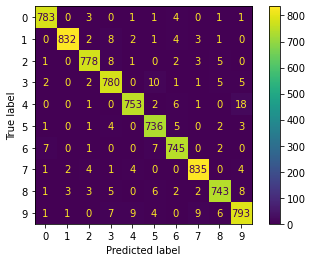

In [63]:
# CODE HERE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test1, cm = test(dense_net, val_dload)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()




In [ ]:
dense_net_small = DenseNet()

### Uppgift 5 - Träna och evaluera SVM:s

1. När vi tränar SVM:s mha scikit-learn så kan vi inte längre använda oss av våra DataLoaders utan behöver därför gå tillbaka till våra dataframes, train_df, train_df_small, val_df och test_df. Skriv kod som separerar varje dataframe i features (pixlar) och labels (klasser) samt normaliserar features [0, 1].
2. Skriv kod för att med hjälp av sklearn och klassen SVC skapa en SVM-modell för bildklassificering.
3. Träna SVM-modellen på träningsdatan.
4. Experimentera er fram till en SVM-modell som presterar bra (>95% accuracy) på det stora träningssetet och jämför sedan resultatet med en kopia av samma nätverk som man tränar om med det lilla datasetet.

In [20]:
# Uppgift 5.1

train_y = 
train_X = 

train_y_small = 
train_X_small = 

val_y = 
val_X = 

test_y = 
test_X = 

SyntaxError: invalid syntax (<ipython-input-20-eb5d71bffa29>, line 3)

In [ ]:
# Uppgift 5.2
# CODE HERE
svm_model = 

In [ ]:
# Uppgift 5.3
# CODE HERE

In [ ]:
def evaluate_svm_model(model, testX, testy):
    # Make predictions
    y_pred = model.predict(testX)
    
    # Calculate accuracy
    acc = metrics.accuracy_score(y_true=testy, y_pred=y_pred)
    # Create confusion matrix
    cm = metrics.confusion_matrix(testy, y_pred)

    print("Accuracy:", round(acc, 4) * 100, "\n")
    print(cm)

In [ ]:
evaluate_svm_model(svm_model, val_X, val_y)

##### Uppgift 5.4
Experimentera er fram till en SVM-modell som presterar bra (>95% accuracy) på det stora träningssetet genom att uppdatera och ändra modellen i Uppgift 5.2.

Jämför sedan resultatet med en kopia av samma modell som man tränar om med det lilla datasetet. Printa båda modellernas accuracy och deras respektive confusion matrix.

In [ ]:
# CODE HERE

### Uppgift 6 - Träna och evaluera CNN

Den sista delen av den här inlämningen är att ni ska implementera och utvärdera ett CNN utifrån de verktyg ni har använt tidigare under uppgiften. En viktig skillnad med convolutions jämfört med FC-lager är att de gradvis minskar storleken på sin output utifrån kernel-size:n (n, m) och att antalet kanaler/channels motsvarar antalet filter i lagret. Exempelvis så kommer en input på 28x28 som körs genom en convolution med kernel-size (3, 4) och stride=1 ge en output som är (28-n+1)x(28-m+1)=26x25. Använder man däremot padding när man genomför sina convolutions så blir input och output lika stora.

I pytorch genomför man convolutions mha:
<pre><code> nn.Conv2d(nr_of_input_filters, nr_of_output_filters, kernel) </pre></code>

För mer information se dokumentationen: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d

1. Gör klart implementationen av ett CNN
2. Experimentera fram ett CNN-nätverk som presterar minst lika bra som Dense-nätet.
3. Jämför sedan resultatet med en kopia av samma modell som man tränar om med det lilla datasetet. Printa båda modellernas accuracy och deras respektive confusion matrix.

In [ ]:
class ConvModel(nn.Module):
    def __init__(self, input_channels=1, num_classes=10):
        super().__init__()
        self.kernel = 
        self.filters = 

        self.conv_in = nn.Conv2d(input_channels, self.filters, self.kernel)
        self.activation = 

    def forward(self, x):
        x = self.conv_in(x)
        x = self.activation(x)

        return x

In [ ]:
conv_net = ConvModel()
print(conv_net)

In [ ]:
# Uppgift 6.2
# CODE HERE

### Uppgift 7 - Jämför restultaten på test-setet

Gör en jämförelse av de tre sätten att klassificera på utifrån de resultat ni har fått på test-setet, både för det stora och det lilla setet med träningsdata. Komplettera er jämförelse med grafer, resultat, kod eller annat som stärker er argumentation i första rutan nedan och skriv en kort beskrivning av era slutsatser i rutan under det.

In [ ]:
# CODE HERE

In [ ]:
# TEXT HERE

### Uppgift 8 - Ungefär hur många timmar har gruppen lagt på att göra klart inlämningen

In [ ]:
# TEXT HERE